In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_excel("Clustering+Clean+Ads_Data.xlsx")
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [17]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [23]:
df.shape

(23066, 19)

In [25]:
df.duplicated().sum()

0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [27]:
df.isna().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [28]:
round(df.describe().T,ndigits=2)

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,385.16,233.65,120.00,120.00,300.00,720.00,728.00
Ad- Width,23066.0,337.90,203.09,70.00,250.00,300.00,600.00,600.00
Ad Size,23066.0,96674.47,61538.33,33600.00,72000.00,72000.00,84000.00,216000.00
Available_Impressions,23066.0,2432043.67,4742887.76,1.00,33672.25,483771.00,2527711.75,27592861.00
Matched_Queries,23066.0,1295099.14,2512969.86,1.00,18282.50,258087.50,1180700.00,14702025.00
Impressions,23066.0,1241519.52,2429399.96,1.00,7990.50,225290.00,1112428.50,14194774.00
Clicks,23066.0,10678.52,17353.41,1.00,710.00,4425.00,12793.75,143049.00
Spend,23066.0,2706.63,4067.93,0.00,85.18,1425.12,3121.40,26931.87
Fee,23066.0,0.34,0.03,0.21,0.33,0.35,0.35,0.35
Revenue,23066.0,1924.25,3105.24,0.00,55.37,926.34,2091.34,21276.18


##### Changing Datatype of Timestamp from Object to datetime64

In [29]:
# Exploring the Timestamp feature for better understanding

df.Timestamp.sample(20)




8816     2020-11-21-11
6140      2020-9-12-23
16674       2020-9-4-0
14632     2020-11-7-18
13619     2020-9-20-23
18967      2020-11-7-8
695         2020-9-3-2
1371      2020-10-23-8
4201     2020-10-23-12
3612      2020-9-28-12
100        2020-9-9-10
8367      2020-10-31-0
22943     2020-11-5-19
12070     2020-10-27-8
5852      2020-10-23-2
842        2020-11-8-1
4140      2020-9-19-20
4965      2020-10-28-5
21823    2020-10-19-10
10412      2020-10-8-0
Name: Timestamp, dtype: object

  OBSERVATIONS AND ACTION ITEMS  
  
  From above analysis, We observed that the Time stamp feature is in the format : yyyy-mm-dd-hh
* Timestamp has current dType as "Object". We will convert it into datetime format
* There are 3 Features with nan values. These are- CTR(25% nan/6465), CPM(25% nan/6465) and CTC(29% nan/7527)

In [30]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='%Y-%m-%d-%H')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  int64         
 3   Ad- Width              23066 non-null  int64         
 4   Ad Size                23066 non-null  int64         
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  int64         
 10  Matched_Queries        23066 non-null  int64         
 11  Impressions            23066 non-null  int64         
 12  Clicks                 23066 non-null  int64         
 13  S

In [32]:
display(df.isna().sum())
display(df.isna().mean())

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

Timestamp                0.000000
InventoryType            0.000000
Ad - Length              0.000000
Ad- Width                0.000000
Ad Size                  0.000000
Ad Type                  0.000000
Platform                 0.000000
Device Type              0.000000
Format                   0.000000
Available_Impressions    0.000000
Matched_Queries          0.000000
Impressions              0.000000
Clicks                   0.000000
Spend                    0.000000
Fee                      0.000000
Revenue                  0.000000
CTR                      0.205324
CPM                      0.205324
CPC                      0.205324
dtype: float64

##### Missing Values imputation

OBSERVATIONS :   
There are 3 Features with nan values. These are-   
CTR(25% nan/6465),   
CPM(25% nan/6465) and  
CTC(29% nan/7527)  

    > Lets explore the distribution in all 3 features

In [33]:
df_mscols = df[['CTR','CPM','CPC']]

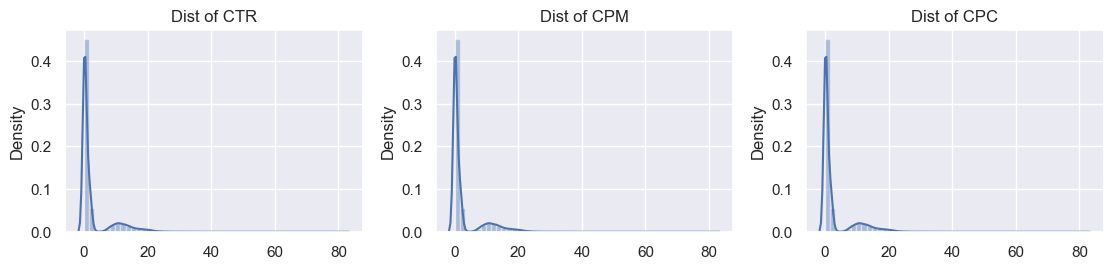

In [34]:
ms_cols=df_mscols.columns

plt.figure(figsize = (15,10))
for i in range(len(ms_cols)):
    plt.subplot(4, 4, i + 1)  # 4 Rows , 4 cols , 1 to #c-len
    sns.distplot(df_mscols)
    plt.title('Dist of {}'.format(ms_cols[i]))
    plt.tight_layout()
    
#> OBS: Excluding the nan values, The distribution looks normal for all 3 Features. 
    #To keep the data symmetric we will impute the null values with median

As the computation method of all 3 parameters are given, we will use the same to fill the null values

In [35]:
#CPM = (Total Campaign Spend / Number of Impressions) * 1,000
#CPC = Total Cost (spend) / Number of Clicks
#CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

def cal_cpm(x): 
    spend=df.Spend 
    impressions=df.Impressions
    cpm = (spend/impressions)*1000
    return cpm

def cal_cpc(x): 
    clicks=df.Clicks 
    spend=df.Spend
    cpc = (spend/clicks)
    return cpc

def cal_ctr(x): 
    clicks=df.Clicks 
    impressions=df.Impressions
    ctr = (clicks/impressions)*100
    return ctr

In [36]:
df['CPM']= df[['CPM']].apply(lambda x: cal_cpm(x))
df['CPC']= df[['CPC']].apply(lambda x: cal_cpc(x))
df['CTR']= df[['CTR']].apply(lambda x: cal_ctr(x))

In [37]:
display(df.isna().sum())
display(df.isna().mean())

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

Timestamp                0.0
InventoryType            0.0
Ad - Length              0.0
Ad- Width                0.0
Ad Size                  0.0
Ad Type                  0.0
Platform                 0.0
Device Type              0.0
Format                   0.0
Available_Impressions    0.0
Matched_Queries          0.0
Impressions              0.0
Clicks                   0.0
Spend                    0.0
Fee                      0.0
Revenue                  0.0
CTR                      0.0
CPM                      0.0
CPC                      0.0
dtype: float64

After imputation the missing values are reduced to - CTR(0.8% nan/219), CPM(.8% nan/219) and CTC(10% nan/2586)
The remaining null values are present due to null value in the parameters (impressions, clicks and sales). We will remove these rows from the dataset for further analysis.

In [38]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [39]:
df.dropna(subset=['CPM'], inplace=True)
df.dropna(subset=['CPC'], inplace=True)
df.dropna(subset=['CTR'], inplace=True)

In [40]:
df.isnull().sum()
#ALl null values treated

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  int64         
 3   Ad- Width              23066 non-null  int64         
 4   Ad Size                23066 non-null  int64         
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  int64         
 10  Matched_Queries        23066 non-null  int64         
 11  Impressions            23066 non-null  int64         
 12  Clicks                 23066 non-null  int64         
 13  S

#### Checking and Treating Outliers


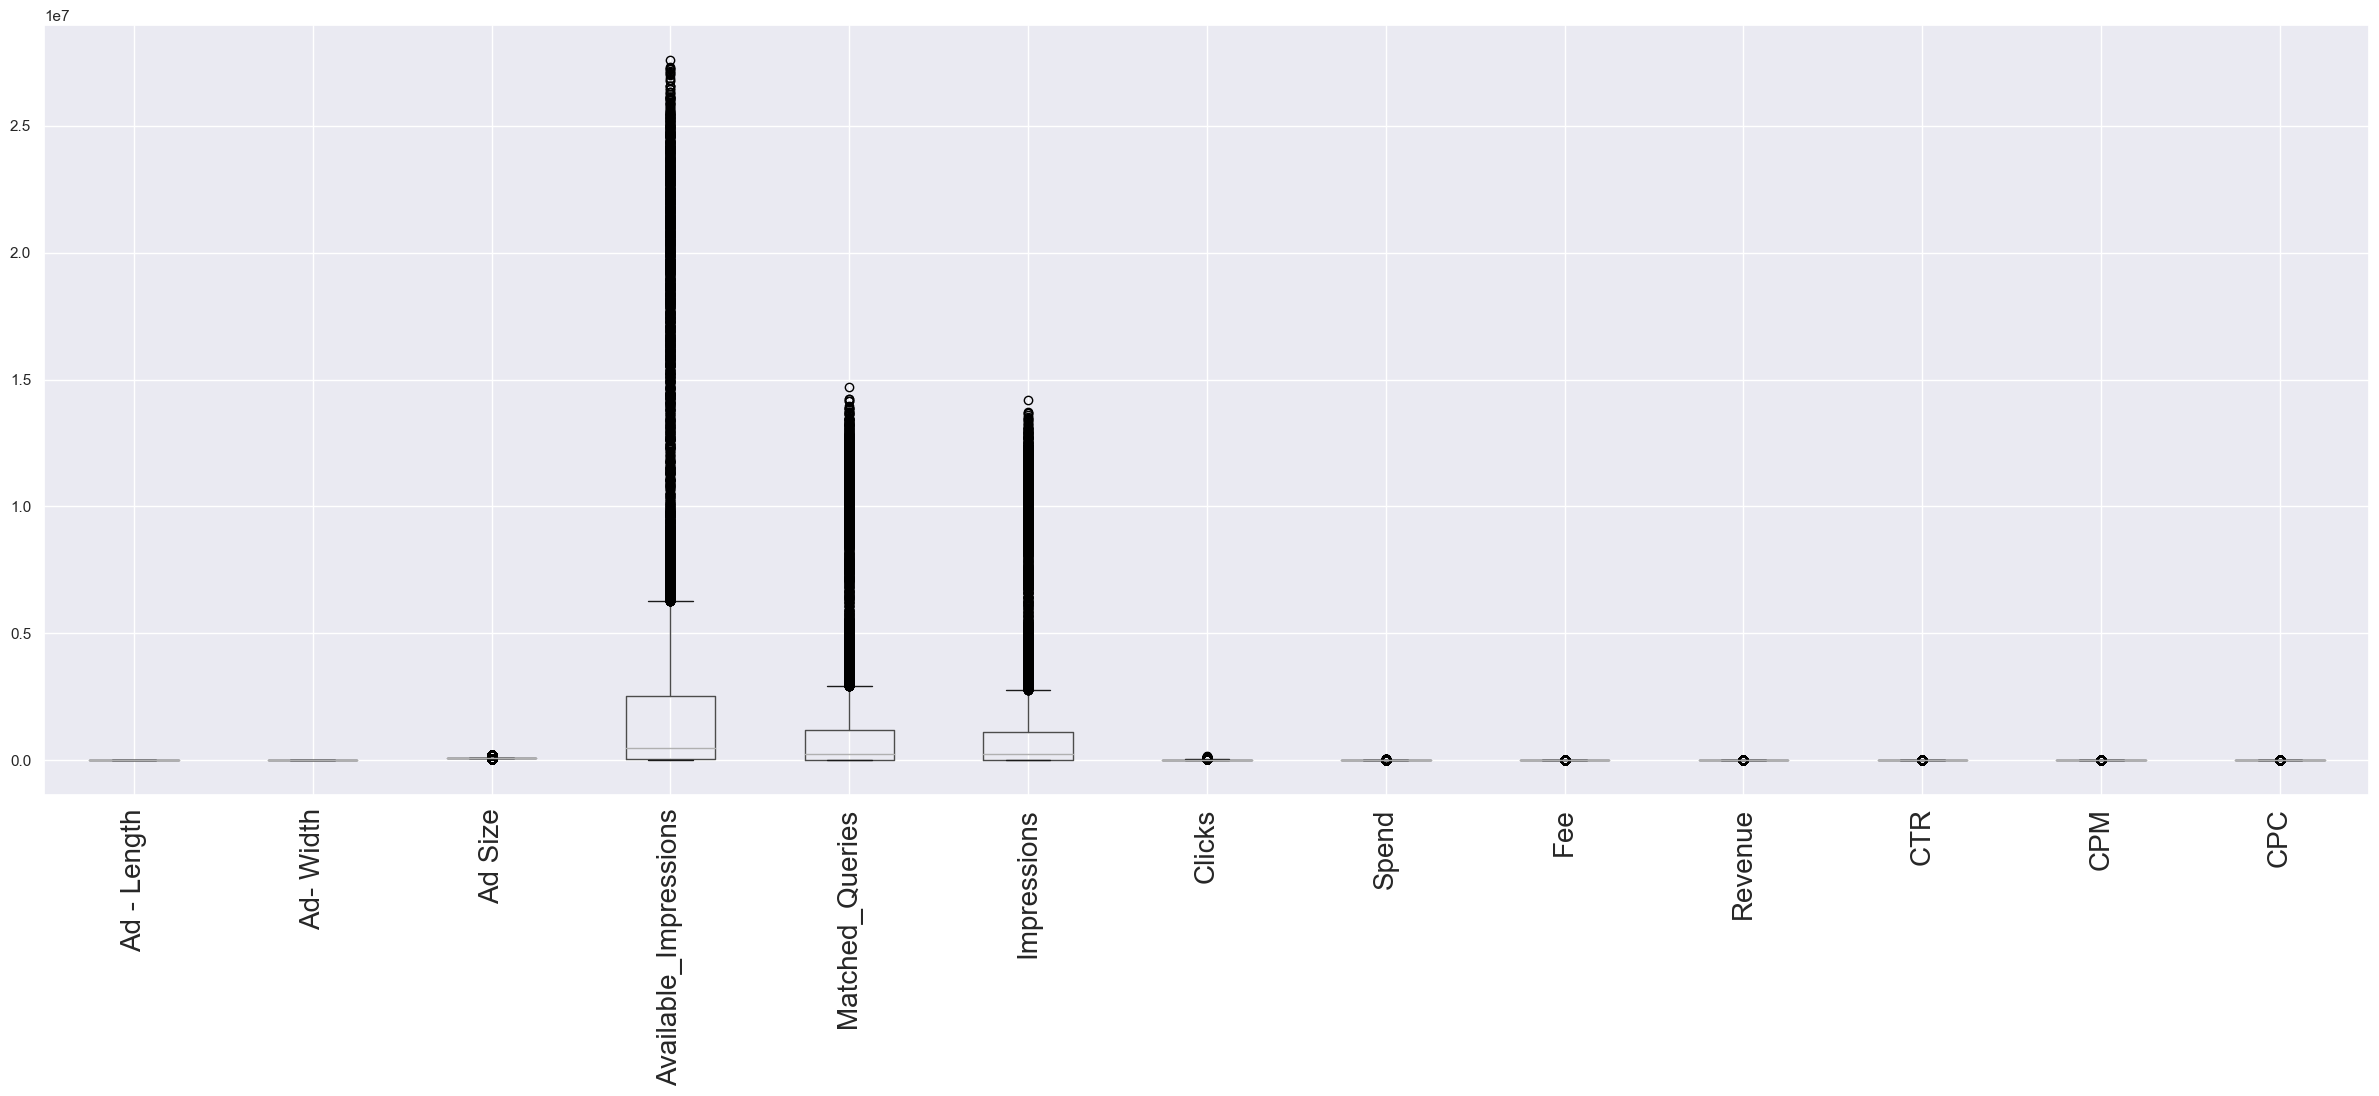

In [43]:
# Boxplot (1st Method)

df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)

df_num.boxplot(figsize=(30,10));
plt.xticks(fontsize=20, rotation=90);
#sns.boxplot(data=df[lstnumericcolumns]);

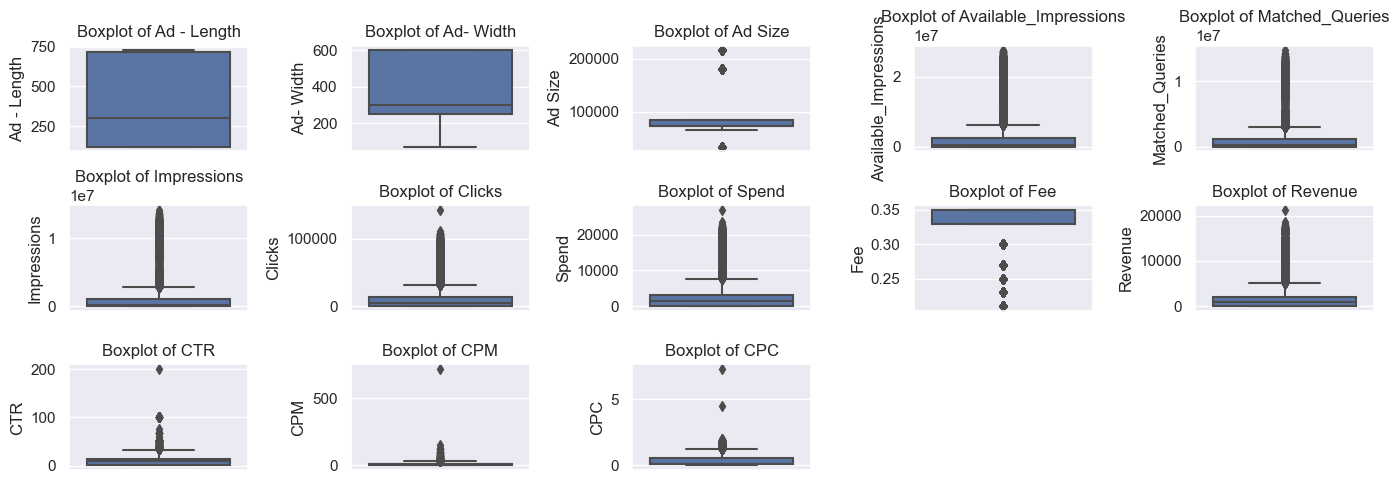

In [44]:
# Boxplot (2nd Method)

plt.figure(figsize = (14,5))
col_list = df_num.columns
for i in range(len(col_list)):
    plt.subplot(3, 5, i + 1)  # 3Rows , 5cols i.e 1 to #c-len
    sns.boxplot(y = df_num[col_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(col_list[i]))
    plt.tight_layout()

OBS (outliers) : From the above set of box plots, its evident that Outliers are present in all numeric Features except for Ad-length and Ad-width

In [45]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_num[column].describe(),end=' ')
        
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_num[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_num[column])
    plt.show()

In [46]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_num[column].describe(),end=' ')
        
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_num[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_num[column])
    plt.show()

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------


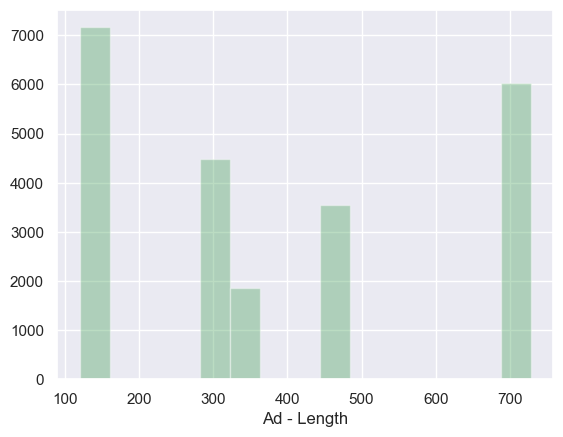

BoxPlot of Ad - Length
----------------------------------------------------------------------------


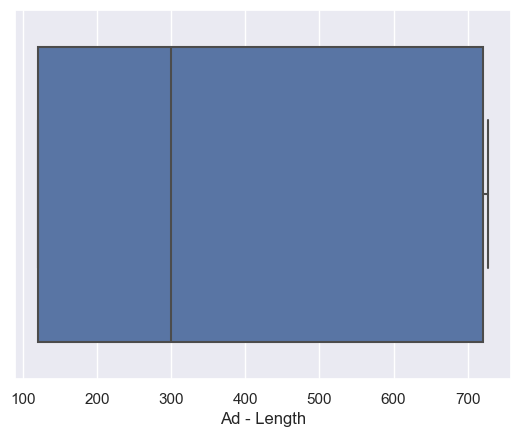

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------


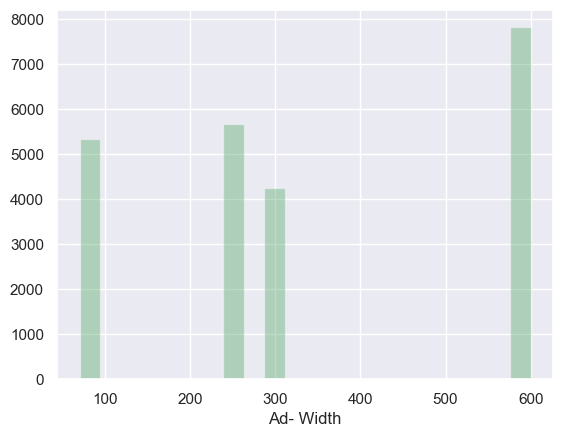

BoxPlot of Ad- Width
----------------------------------------------------------------------------


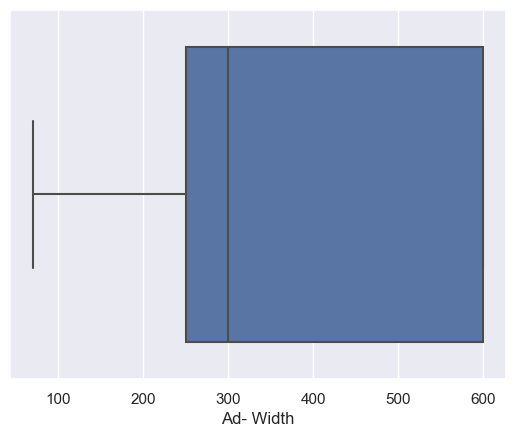

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------


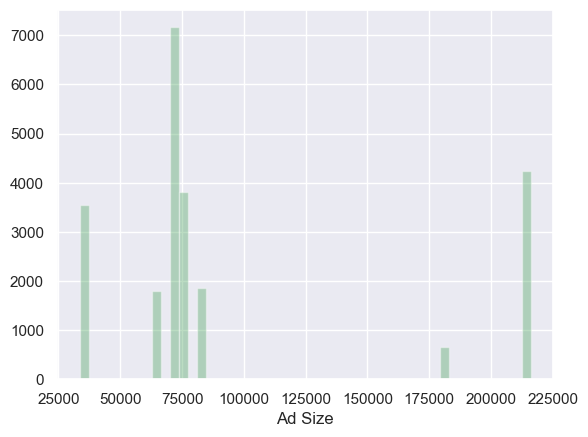

BoxPlot of Ad Size
----------------------------------------------------------------------------


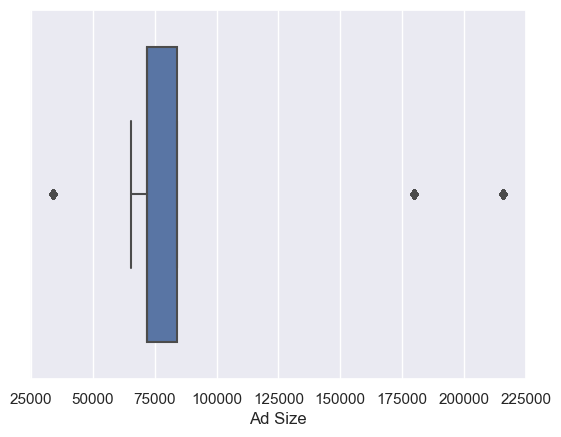

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------


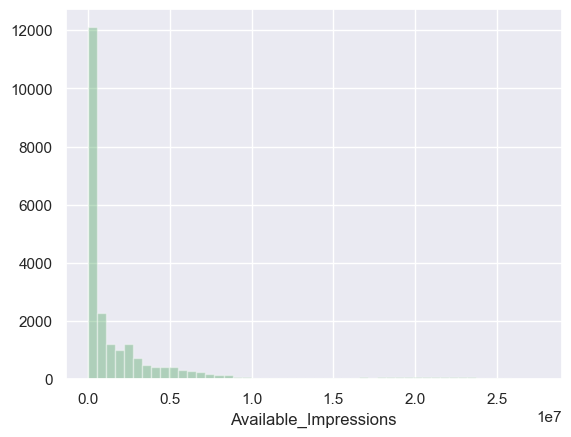

BoxPlot of Available_Impressions
----------------------------------------------------------------------------


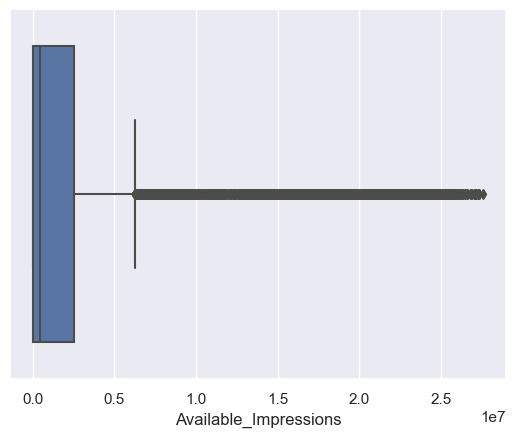

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------


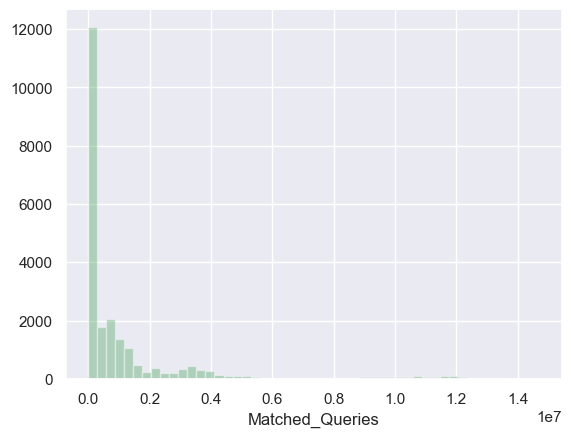

BoxPlot of Matched_Queries
----------------------------------------------------------------------------


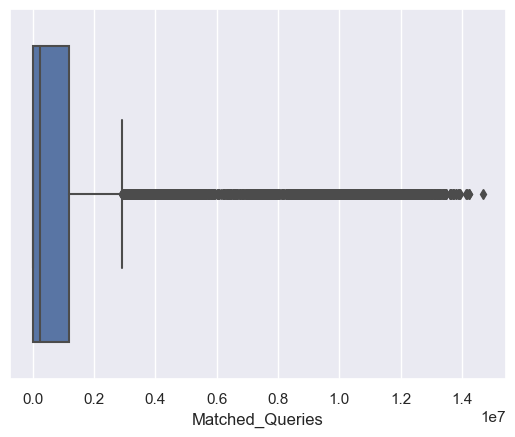

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------


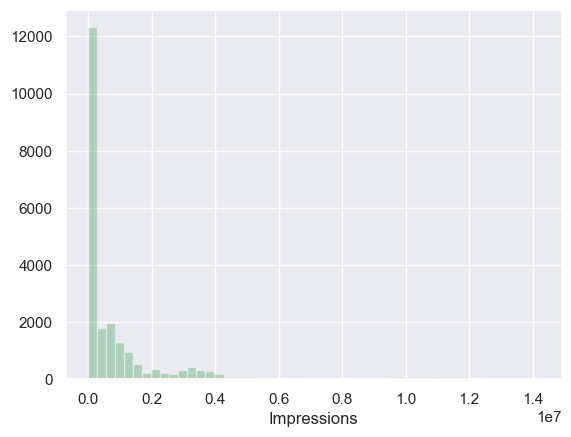

BoxPlot of Impressions
----------------------------------------------------------------------------


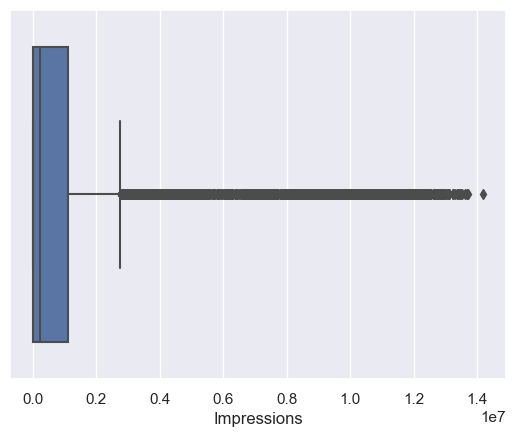

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------


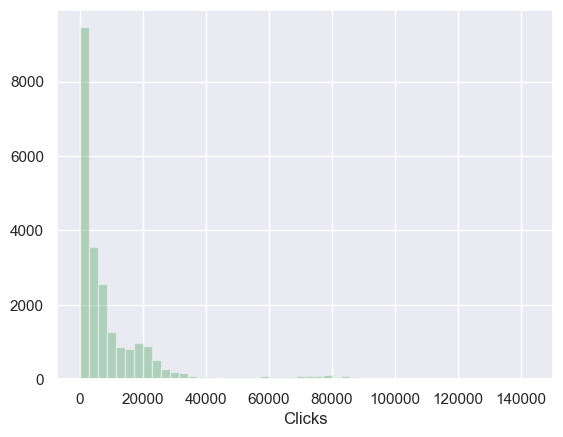

BoxPlot of Clicks
----------------------------------------------------------------------------


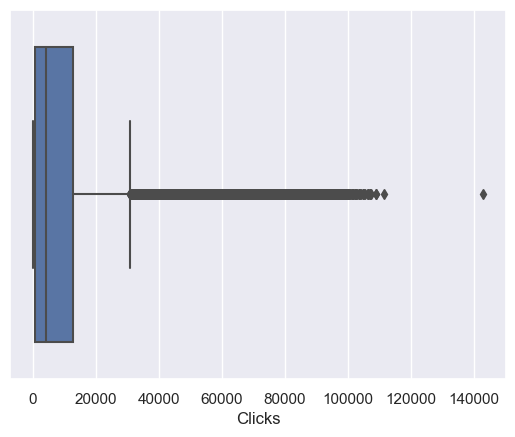

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------


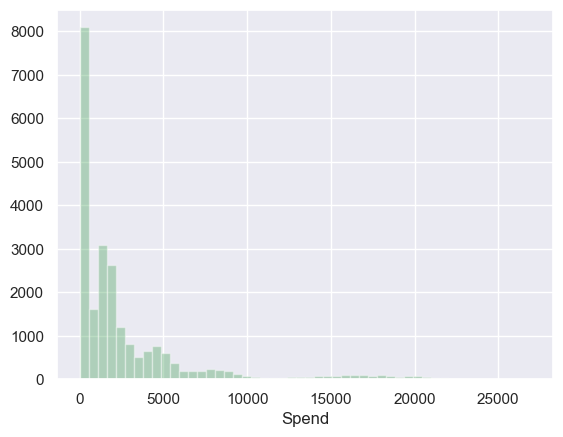

BoxPlot of Spend
----------------------------------------------------------------------------


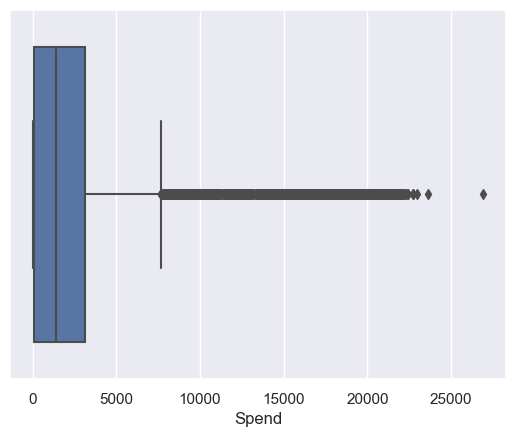

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------


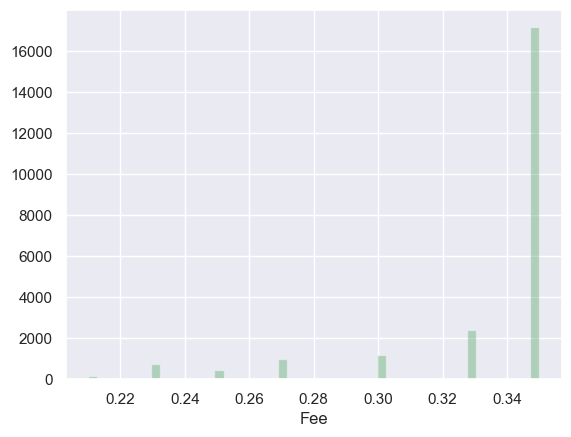

BoxPlot of Fee
----------------------------------------------------------------------------


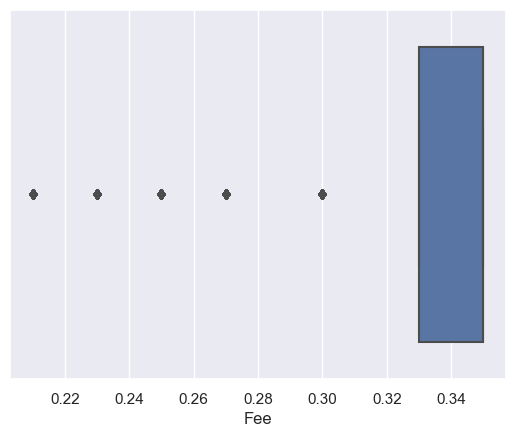

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------


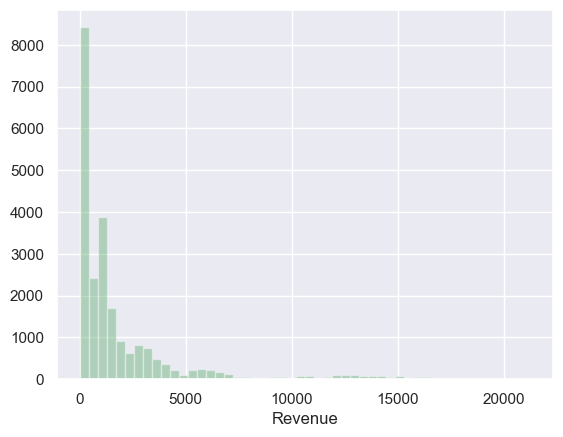

BoxPlot of Revenue
----------------------------------------------------------------------------


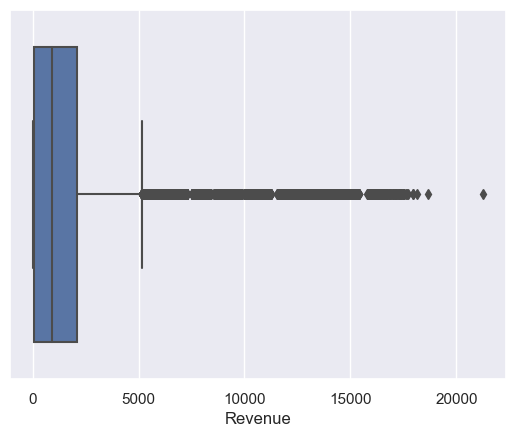

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------


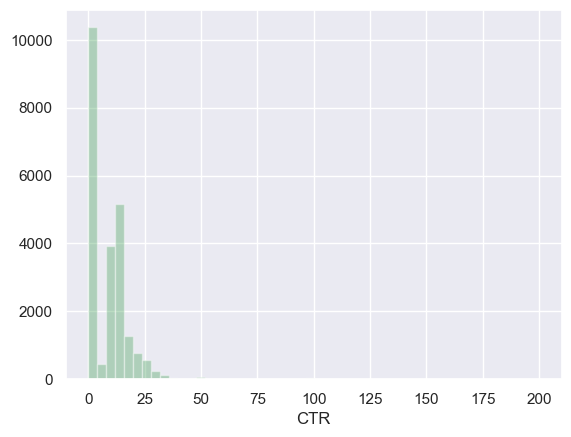

BoxPlot of CTR
----------------------------------------------------------------------------


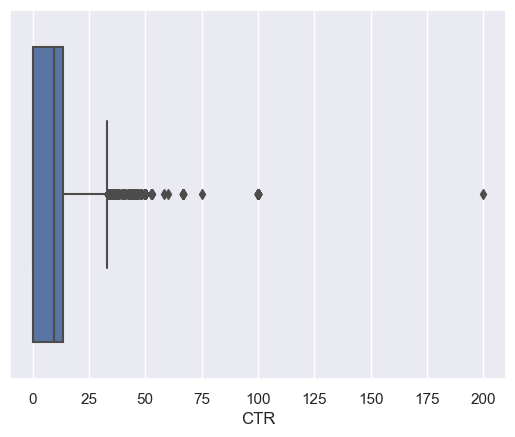

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.396849
std          9.057760
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max        715.000000
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------


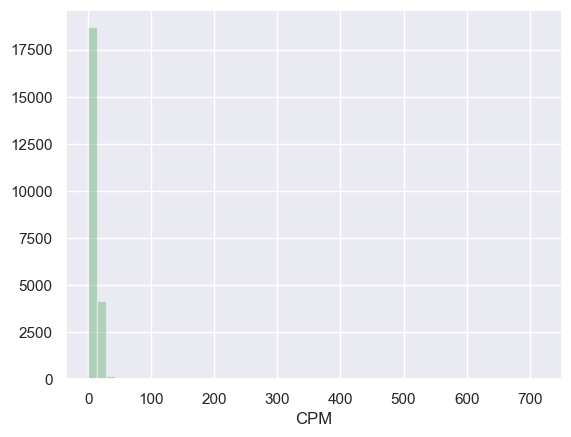

BoxPlot of CPM
----------------------------------------------------------------------------


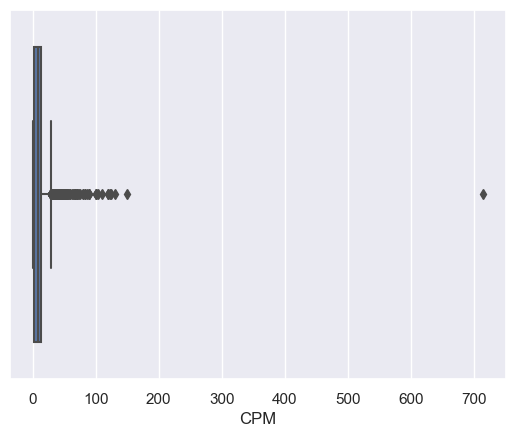

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean         0.336678
std          0.341253
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          7.264000
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------


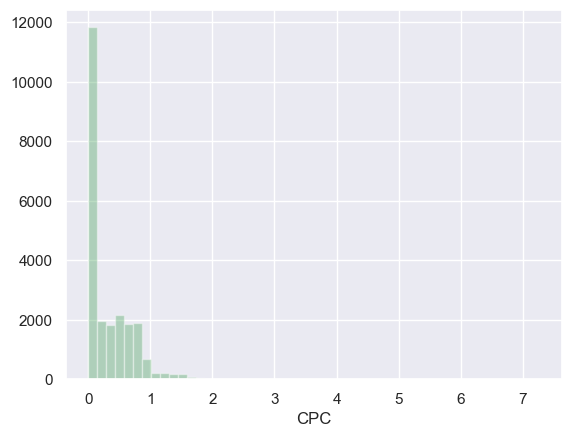

BoxPlot of CPC
----------------------------------------------------------------------------


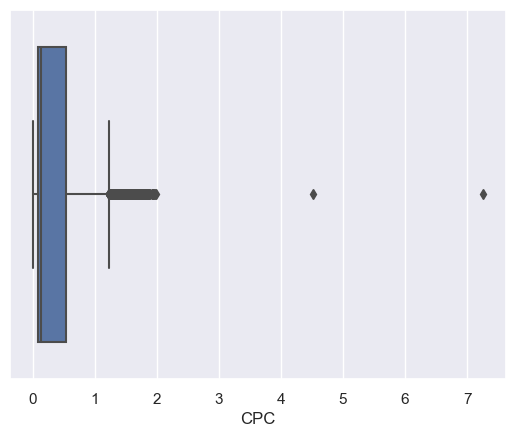

In [47]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)


#### OUTLIER TREATMENT  


In [48]:
# To treat outliers lets define a function 'treat_outlier'.  
# For the higher outliers we will treat it to get it at 95 percentile value.  
# Lower level outliers will be treated to get it at 5 percentile value.



def treat_outlier(x):    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    
    dt=np.percentile(x,95)
  
    #calculationg IQR range
    IQR=q75-q25
    
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

for i in df_num[df_num.columns]:    
    df_num[i]=treat_outlier(df_num[i])


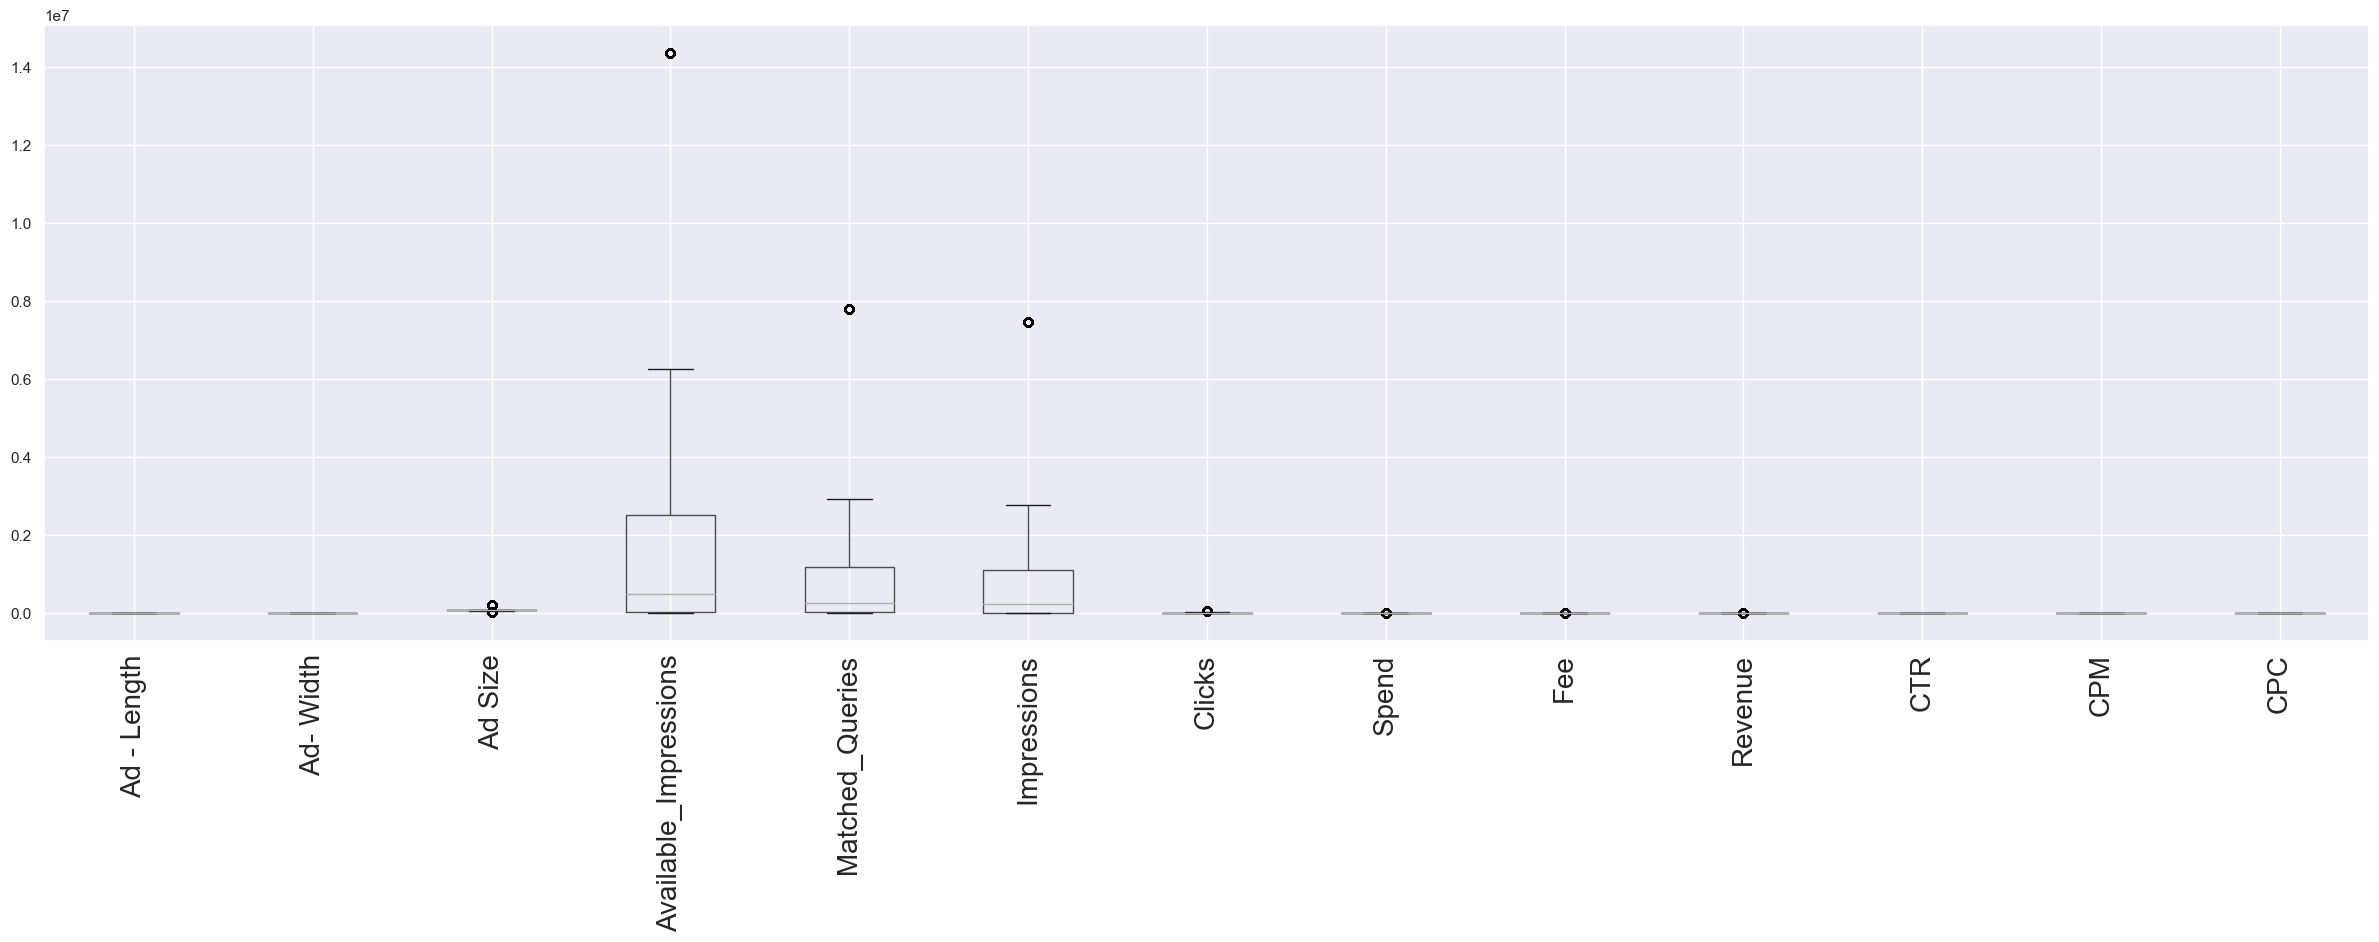

In [49]:
# Boxplot after Outlier treatment (method-1)
df_num.boxplot(figsize=(30,8));
plt.xticks(fontsize=20, rotation=90);
#sns.boxplot(data=df_num[df_num.columns]);

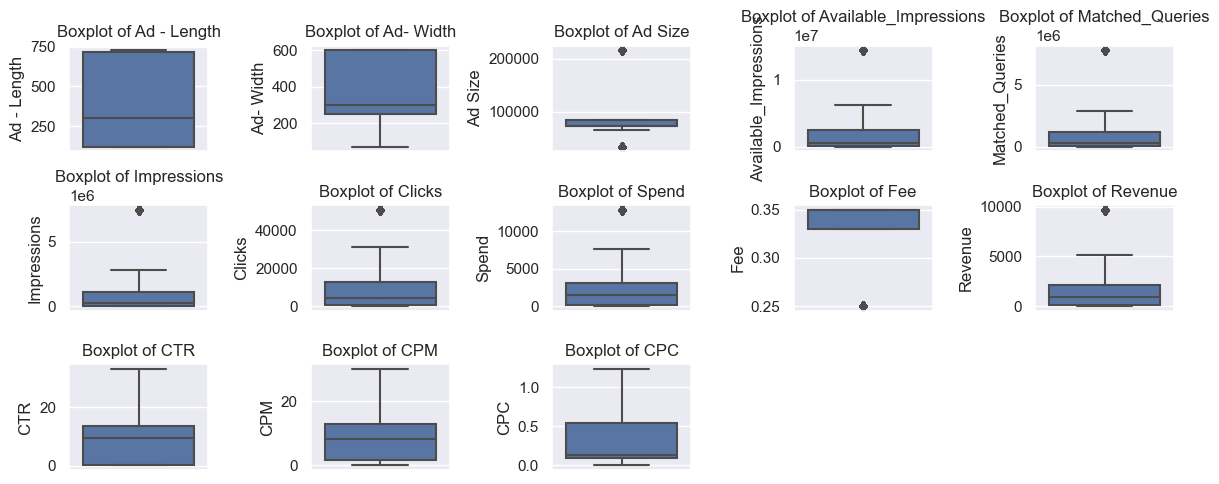

In [50]:
# Boxplot after Outlier treatment (method-2)
plt.figure(figsize = (12,5))
col_list = df_num.columns
for i in range(len(col_list)):
    plt.subplot(3, 5, i + 1)  # 3Rows , 5cols i.e 1 to #c-len
    sns.boxplot(y = df_num[col_list[i]], data = df_num);
    plt.title('Boxplot of {}'.format(col_list[i]));
    plt.tight_layout();

In [51]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 2.3 MB


In [52]:
round(df_num.describe().T,ndigits=2)

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,385.16,233.65,120.00,120.00,300.00,720.00,728.00
Ad- Width,23066.0,337.90,203.09,70.00,250.00,300.00,600.00,600.00
Ad Size,23066.0,97702.99,63200.86,33600.00,72000.00,72000.00,84000.00,216000.00
Available_Impressions,23066.0,2441825.12,4284703.91,1.00,33672.25,483771.00,2527711.75,14363912.25
Matched_Queries,23066.0,1474737.89,2600153.93,1.00,18282.50,258087.50,1180700.00,7803449.00
Impressions,23066.0,1420322.28,2518036.85,1.00,7990.50,225290.00,1112428.50,7473380.25
Clicks,23066.0,9754.19,13550.54,1.00,710.00,4425.00,12793.75,50662.00
Spend,23066.0,2637.37,3649.03,0.00,85.18,1425.12,3121.40,12899.76
Fee,23066.0,0.33,0.04,0.25,0.33,0.35,0.35,0.35
Revenue,23066.0,1905.95,2819.03,0.00,55.37,926.34,2091.34,9674.82


In [53]:
#df_num1 = df_num[['CTR', 'CPM', 'CPC']].copy()
#df_num1.sample(5)

In [54]:
#df_num1

In [55]:
#df_num1_cols = df_num1[['CTR','CPM','CPC']]

In [56]:
#num1_col_list = df_num1_cols.columns

#plt.figure(figsize = (15,10))
#for i in range(len(num1_col_list)):
    #plt.subplot(4, 4, i + 1)  # 4 Rows , 4 cols , 1 to #c-len
    #sns.distplot(df_num1_cols)
    #plt.title('Dist of {}'.format(num1_col_list[i]))
    #plt.tight_layout()

In [57]:
# importing the StandardScaler Module
#from sklearn.preprocessing import StandardScaler

# Creating an object for the StandardScaler function
#X = StandardScaler()

#### SCALING THE DATA

In [58]:
#Scale the data
from scipy.stats import zscore
df_num_sc = df_num.apply(zscore)

In [59]:
#Check the data post scaling
df_num_sc.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.359227,-0.569484,-0.567061,-0.563943,-0.719779,-0.722776,0.487214,-0.676118,-0.978830,-1.220346,-1.083011
1,-0.364496,-0.432797,-0.359227,-0.569490,-0.567076,-0.563958,-0.719779,-0.722776,0.487214,-0.676118,-0.973650,-1.220346,-1.083011
2,-0.364496,-0.432797,-0.359227,-0.569269,-0.567049,-0.563931,-0.719779,-0.722776,0.487214,-0.676118,-0.982332,-1.220346,-1.083011
3,-0.364496,-0.432797,-0.359227,-0.569339,-0.566994,-0.563875,-0.719779,-0.722776,0.487214,-0.676118,-0.992329,-1.220346,-1.083011
4,-0.364496,-0.432797,-0.359227,-0.569622,-0.567093,-0.563975,-0.719779,-0.722776,0.487214,-0.676118,-0.965826,-1.220346,-1.083011


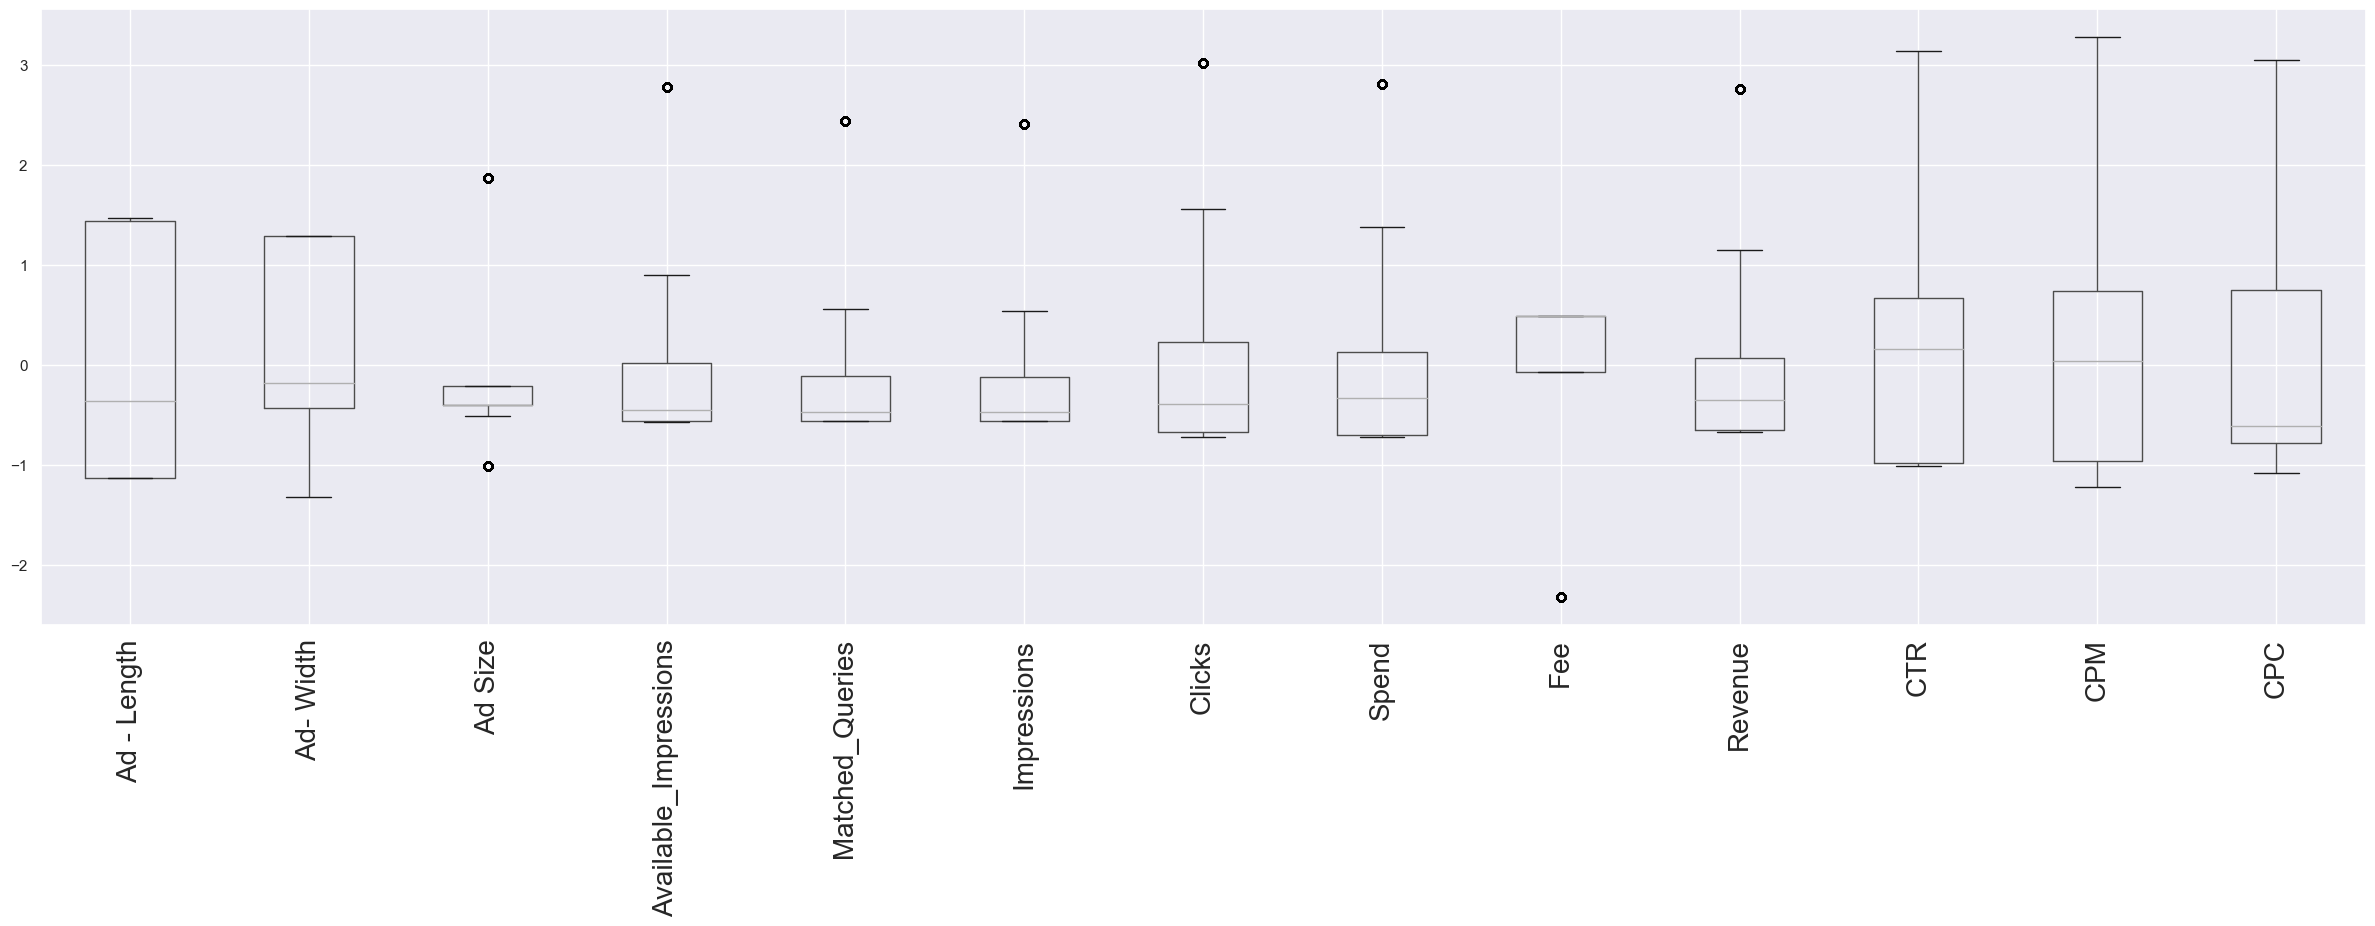

In [60]:
# Boxplot after Outlier treatment (method-2)
df_num_sc.boxplot(figsize=(30,8));
plt.xticks(fontsize=20, rotation=90);
#sns.boxplot(data=df_num[df_num.columns]);

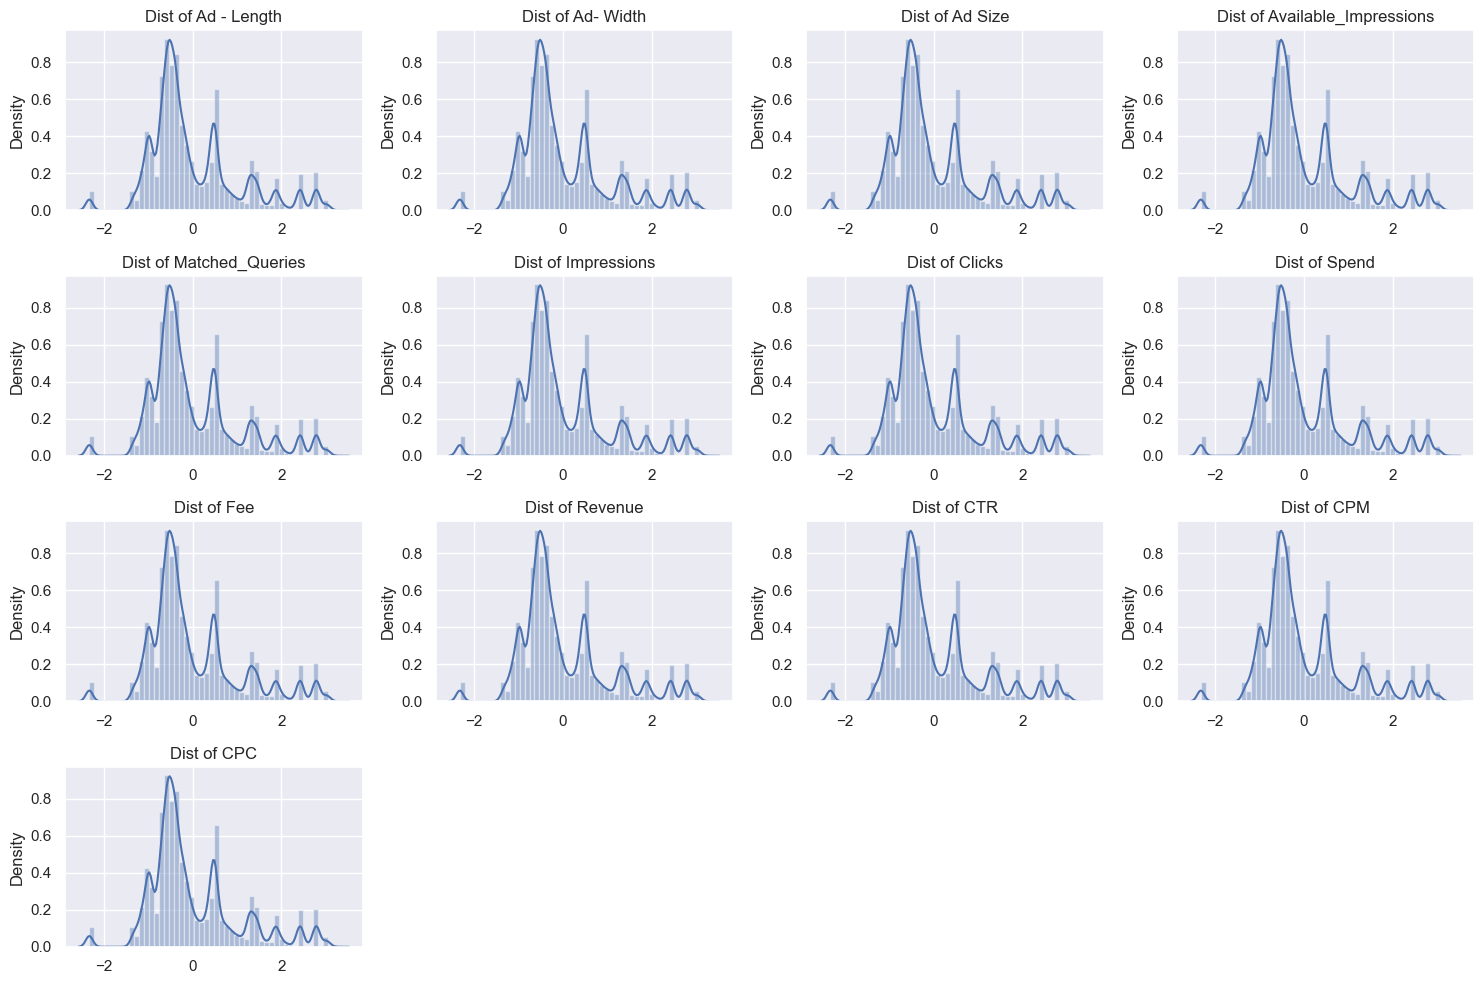

In [61]:
# Plot the distribution of each column in the dataframe.

sc_cols=df_num_sc.columns

plt.figure(figsize = (15,10))
for i in range(len(sc_cols)):
    plt.subplot(4, 4, i + 1)  # 4 Rows , 4 cols , 1 to #c-len
    sns.distplot(df_num_sc)
    plt.title('Dist of {}'.format(sc_cols[i]))
    plt.tight_layout()

In [62]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


In [63]:
round(df_num_sc.describe().T,ndigits=2)

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,0.0,1.0,-1.13,-1.13,-0.36,1.43,1.47
Ad- Width,23066.0,-0.0,1.0,-1.32,-0.43,-0.19,1.29,1.29
Ad Size,23066.0,-0.0,1.0,-1.01,-0.41,-0.41,-0.22,1.87
Available_Impressions,23066.0,0.0,1.0,-0.57,-0.56,-0.46,0.02,2.78
Matched_Queries,23066.0,-0.0,1.0,-0.57,-0.56,-0.47,-0.11,2.43
Impressions,23066.0,0.0,1.0,-0.56,-0.56,-0.47,-0.12,2.40
Clicks,23066.0,0.0,1.0,-0.72,-0.67,-0.39,0.22,3.02
Spend,23066.0,-0.0,1.0,-0.72,-0.70,-0.33,0.13,2.81
Fee,23066.0,0.0,1.0,-2.32,-0.07,0.49,0.49,0.49
Revenue,23066.0,0.0,1.0,-0.68,-0.66,-0.35,0.07,2.76


### Creating Clusters using HIERARCHIAL CLUSTERING

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [65]:
wardlink = linkage(df_num_sc, method = 'ward',)

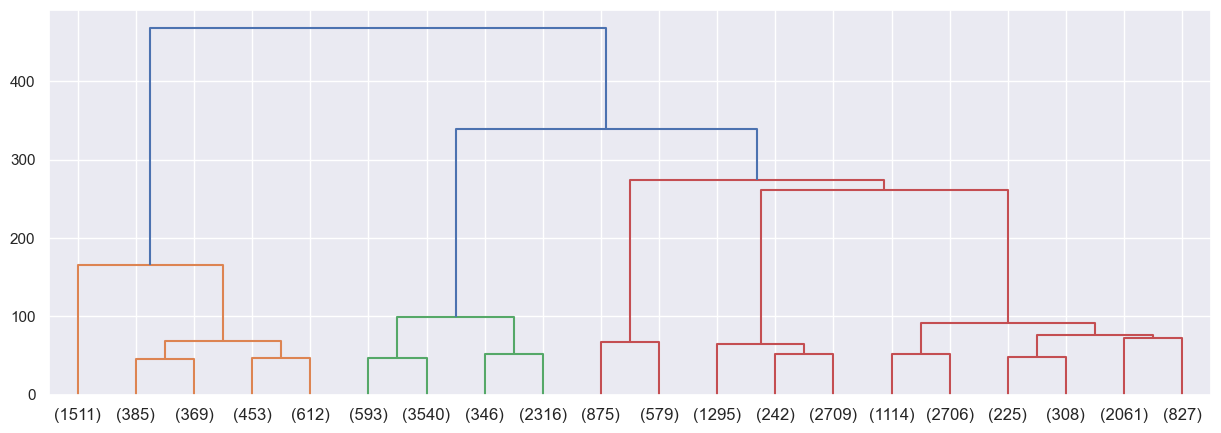

In [66]:
#dend = dendrogram(wardlink)
plt.figure(figsize = (15,5))
dend = dendrogram(wardlink,truncate_mode='lastp',p = 20,)

In [67]:
from scipy.cluster.hierarchy import fcluster

In [68]:
clusters = fcluster(wardlink, 20, criterion='distance')
clusters

array([12, 12, 12, ..., 26, 34, 26], dtype=int32)

In [69]:
df_num_sc['clusters'] = clusters

In [70]:
df_num_sc.sample(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
21842,-0.364496,-0.432797,-0.359227,-0.349228,-0.323391,-0.322015,-0.583472,-0.367947,0.487214,-0.377574,-0.979632,-0.901597,1.271363,19
22696,1.433093,-0.186599,1.871803,-0.569905,-0.567185,-0.564071,-0.719779,-0.722765,0.487214,-0.676109,1.966625,1.837470,-0.948595,26
946,-1.134891,1.290590,-0.406696,-0.569532,-0.566938,-0.563833,-0.710333,-0.720284,0.487214,-0.674022,1.671281,1.045338,-0.846220,35
22156,-1.134891,1.290590,-0.406696,-0.569839,-0.567146,-0.564034,-0.718599,-0.722493,0.487214,-0.675881,1.251727,0.423804,-0.879410,36
3551,-1.134891,1.290590,-0.406696,-0.565614,-0.561926,-0.561418,-0.639781,-0.701559,0.487214,-0.658268,1.019899,0.518170,-0.843230,36


In [71]:
df_num_sc.clusters.unique()

# Total 11 clusters formed

array([12, 27, 38, 26, 42, 39, 41, 35, 34, 37, 36, 13, 19, 32, 14, 33, 15,
       31, 29, 40, 18, 30, 16, 28, 25, 22, 17, 11, 10,  9,  7,  8,  5,  6,
       24, 23,  4, 21,  1, 20,  3,  2])

#### DENDOGRAM USING EUCLIDEAN DISTANCES

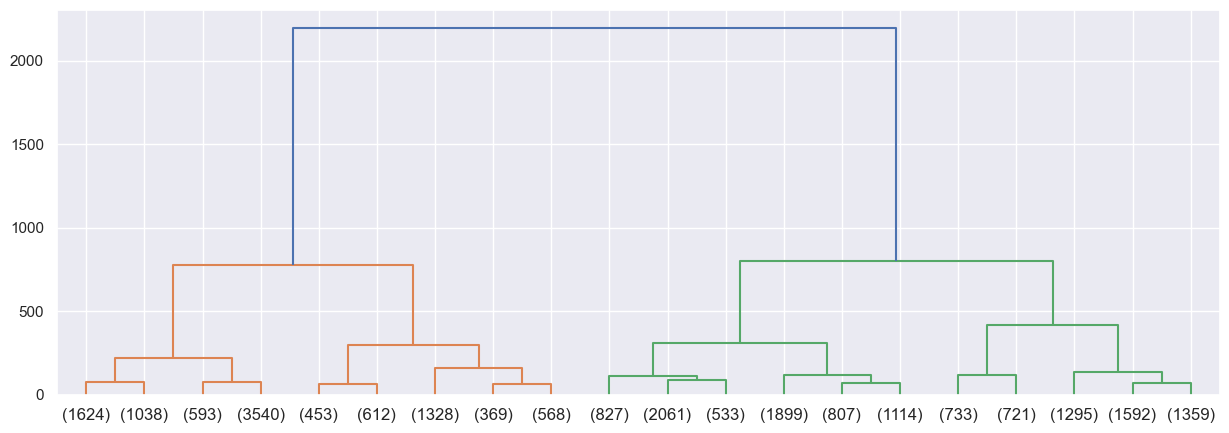

In [72]:
# Dendrogram using Eclidean distance. 
#> we compute the ward linkage using euclidean distance, and visualize it using a dendrogram:

plt.figure(figsize = (15,5))
linkage_data = linkage(df_num_sc, method='ward', metric='euclidean')
dendrogram(linkage_data,truncate_mode='lastp',p = 20,)

plt.show()

### ELBOW PLOT



In [73]:
# Elbow plot (till n=10)

from sklearn.cluster import KMeans 

k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(df_num_sc)
k_means.inertia_

63944.29253879197

In [74]:
wss=[]

In [75]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_num_sc)
    wss.append(KM.inertia_)

In [76]:
wss

[3323749.850212435,
 844094.543094104,
 497565.41570364893,
 269799.12706082006,
 193975.78599335742,
 147249.5000124639,
 108135.79391968806,
 84133.97365879791,
 73652.19073304742,
 63944.29253879196]

In [77]:
a=[1,2,3,4,5,6,7,8,9,10]

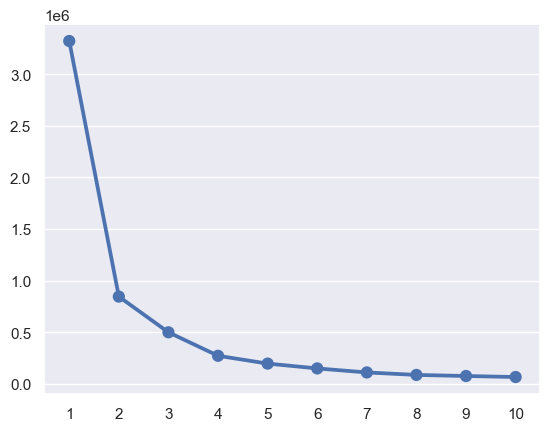

In [78]:
sns.pointplot(x=a, y=wss);

### Cluster evaluation using SILHOUETTE SCORE


In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [80]:
# Getting Silhouette Score clusters from 2 to 14

ss={1:0}
for i in range(2, 15):
    clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y=clusterer.fit_predict(df_num_sc) # The higher (up to 1) the better
    s =silhouette_score(df_num_sc, y )
    ss[i]=round(s,5) 
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.6485
The Average Silhouette Score for 3 clusters is 0.62221
The Average Silhouette Score for 4 clusters is 0.58781
The Average Silhouette Score for 5 clusters is 0.59525
The Average Silhouette Score for 6 clusters is 0.60913
The Average Silhouette Score for 7 clusters is 0.6033
The Average Silhouette Score for 8 clusters is 0.59729
The Average Silhouette Score for 9 clusters is 0.60793
The Average Silhouette Score for 10 clusters is 0.57733
The Average Silhouette Score for 11 clusters is 0.59517
The Average Silhouette Score for 12 clusters is 0.58739
The Average Silhouette Score for 13 clusters is 0.58901
The Average Silhouette Score for 14 clusters is 0.60091


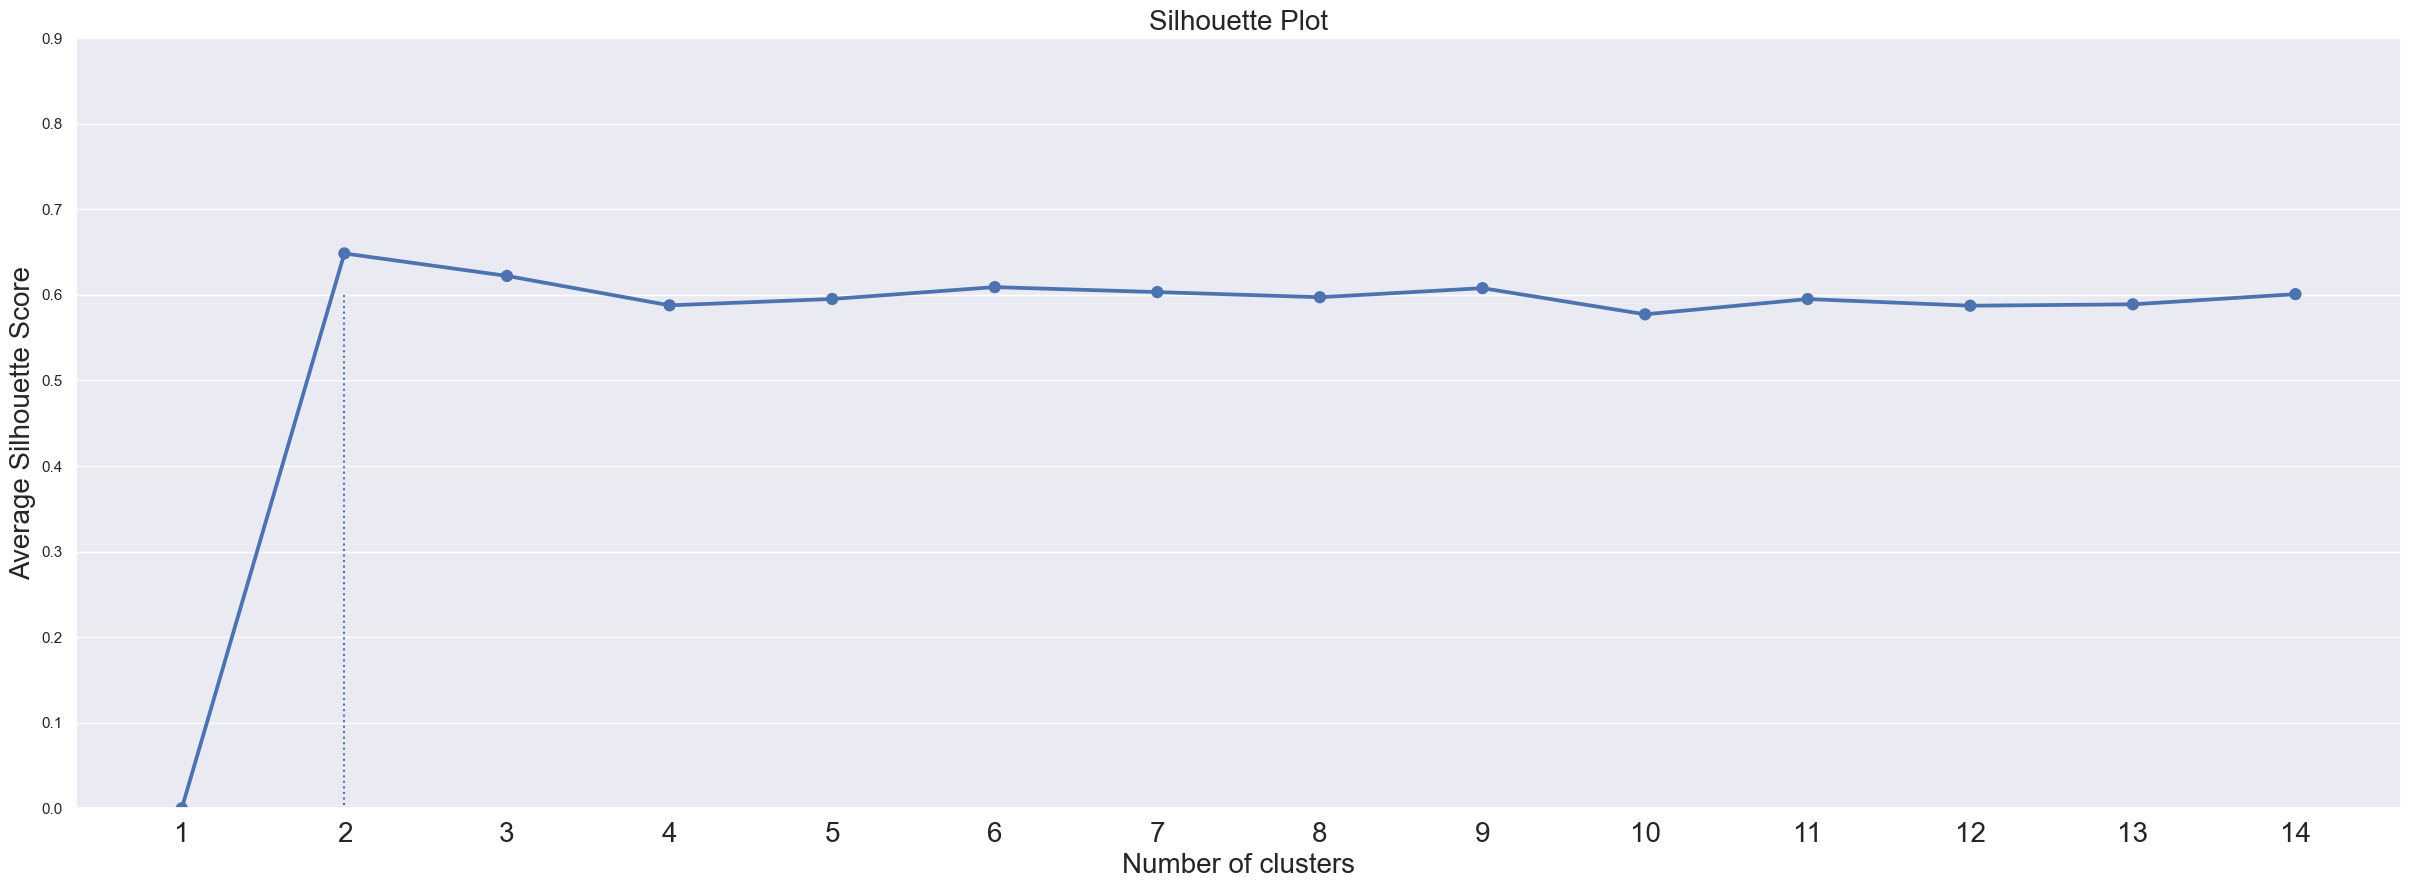

In [84]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(30,10))
sns.pointplot(x=list(ss.keys()), y=list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.60,linestyles='dotted')
ax.set(ylim=(0, 0.90))
ax.set_title('Silhouette Plot',fontsize=20)
ax.set_xlabel('Number of clusters',fontsize=20)
ax.set_ylabel('Average Silhouette Score',fontsize=20)
plt.xticks(fontsize=20, rotation=0);
plt.show()

It is clear from above plot that the maximum value of average silhouette score is achieved for k = 8, which, therefore, is considered to be the optimum number of clusters for this data.

### Clustering using K-MEANS

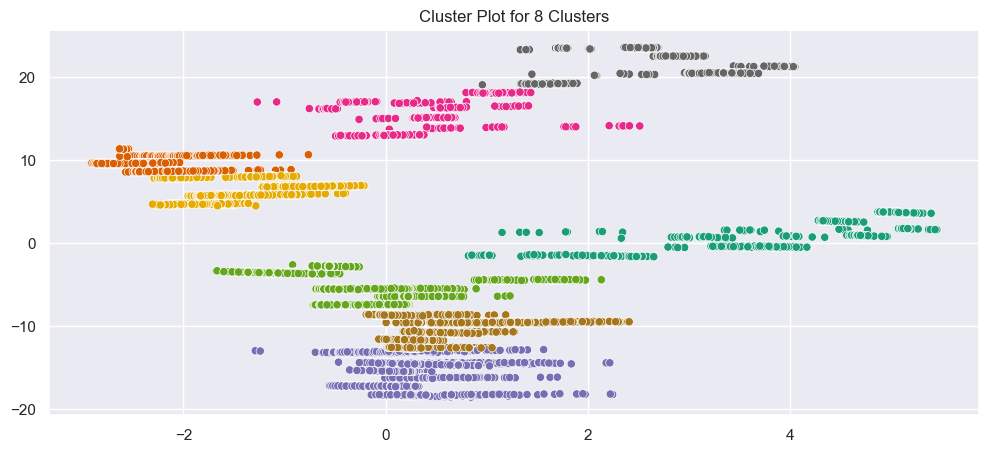

In [85]:
# Creating a PCA object with two components. 
# PCA will reduce the dimensionality of the data to two dimensions.

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(df_num_sc)

plt.figure(figsize=(12,5))
sns.scatterplot(x=plot_columns[:,1],y=plot_columns[:,0], hue=KMeans(n_clusters=8, random_state=0).fit(df_num_sc).labels_, palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 8 Clusters')
plt.show()

In [86]:
# For number of clusters=8, we have got better Silhouette Score. Hence we consider no of clusters = 8 and append the original dataset

k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(df_num_sc)
labels = k_means.labels_

In [87]:
df_num_sc["Clus_kmeans8"] = labels
df_num_sc.sample(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans8
10800,-0.210417,-0.432797,-0.216821,-0.031449,-0.108032,-0.116916,-0.626718,-0.221612,0.487214,-0.254453,-1.003615,-0.976639,2.026966,18,7
708,-0.210417,-0.432797,-0.216821,-0.569596,-0.567031,-0.563924,-0.714244,-0.720964,0.487214,-0.674593,1.545989,1.445840,-0.790744,42,3
13387,-0.364496,-0.432797,-0.359227,0.081427,0.000818,0.005895,-0.439637,0.109826,-0.074887,0.045969,-0.984480,-0.902706,1.605773,18,7
8924,-0.210417,-0.432797,-0.216821,-0.220291,-0.275235,-0.279338,-0.426943,-0.320328,0.487214,-0.337508,-0.948212,-0.913007,0.160322,13,1
14127,-0.364496,-0.432797,-0.359227,0.323913,0.297394,0.301867,-0.275286,0.345215,-0.074887,0.250115,-0.983011,-0.952166,1.090898,17,7


#### For Ad_profiling, lets consider the number of Clusters 4 

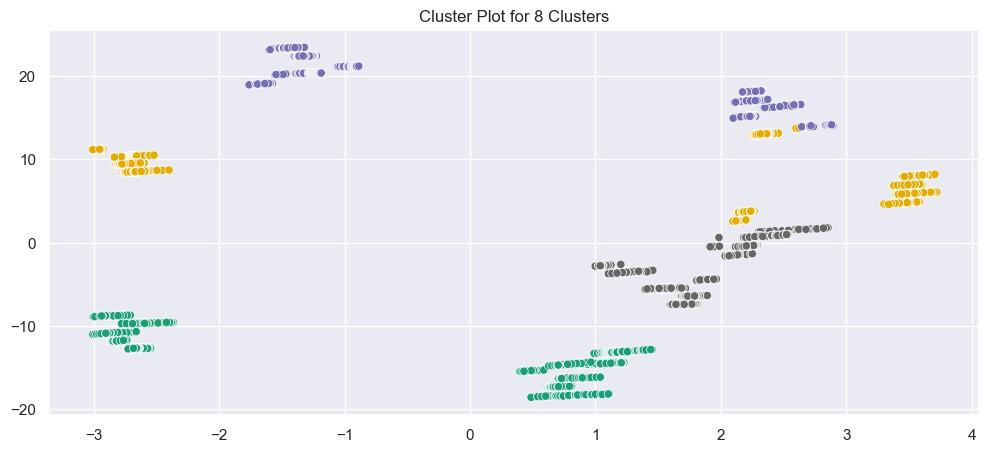

In [88]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(df_num_sc)
plt.figure(figsize=(12,5))
sns.scatterplot(x=plot_columns[:,1],y=plot_columns[:,0], hue=KMeans(n_clusters=4, random_state=0).fit(df_num_sc).labels_, palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 8 Clusters')
plt.show()

In [89]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_num_sc)
labels = k_means.labels_

In [90]:
df_num_sc["Clus_kmeans4"] = labels
df_num_sc.sample(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans8,Clus_kmeans4
18838,-1.134891,1.290590,-0.406696,-0.549391,-0.539357,-0.539772,0.297693,-0.351192,0.487214,-0.363476,1.810112,2.104806,-0.752554,34,0,1
20109,-0.364496,-0.432797,-0.359227,0.486819,0.343063,0.362446,-0.263035,0.279281,-0.074887,0.192931,-0.984385,-0.985174,0.901989,17,7,0
7044,-1.134891,1.290590,-0.406696,-0.551850,-0.542987,-0.543791,-0.184881,-0.432848,0.487214,-0.432181,0.763622,1.888198,-0.592588,32,0,1
21248,0.405899,-1.319110,-1.014296,-0.243465,-0.292454,-0.295766,-0.387165,-0.312591,0.487214,-0.330999,-0.933947,-0.887920,0.032706,15,1,0
13134,-0.364496,-0.432797,-0.359227,0.410934,0.297251,0.316075,-0.337867,0.054216,0.487214,-0.022375,-0.988372,-1.028387,0.757680,17,7,0


In [91]:
Ad_profile=df_num_sc.groupby('Clus_kmeans4').mean()
Ad_profile['freq']=df_num_sc.Clus_kmeans4.value_counts().sort_index()
round(Ad_profile,ndigits=2)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans8,freq
Clus_kmeans4,,,,,,,,,,,,,,,,
0,-0.01,-0.69,-0.64,-0.06,-0.02,-0.01,-0.13,0.05,0.13,0.05,-0.82,-0.77,0.59,15.75,3.69,8109
1,-0.97,1.09,-0.22,-0.54,-0.54,-0.54,-0.49,-0.62,0.48,-0.59,0.86,0.84,-0.69,36.67,1.42,7241
2,1.09,-0.02,1.57,-0.50,-0.50,-0.50,0.76,-0.19,0.16,-0.20,0.64,0.58,-0.77,28.16,4.15,4967
3,0.61,-0.80,-0.37,2.50,2.38,2.36,0.28,1.84,-1.93,1.78,-0.99,-0.98,1.47,4.28,3.24,2749


In [92]:
Ad_profile=Ad_profile.drop([ 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Available_Impressions','Matched_Queries', 'Impressions','Fee'],axis=1)
Ad_profile

,Clicks,Spend,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans8,freq
Clus_kmeans4,,,,,,,,,
0,-0.127212,0.045766,0.047607,-0.819570,-0.772461,0.593659,15.747564,3.689481,8109
1,-0.485523,-0.618027,-0.587457,0.857577,0.839612,-0.693186,36.665102,1.417346,7241
2,0.759213,-0.189346,-0.203804,0.636611,0.581763,-0.774047,28.160459,4.145158,4967
3,0.282367,1.835031,1.775200,-0.991585,-0.984125,1.473289,4.277555,3.241179,2749


#CPM = (Total Campaign Spend / Number of Impressions) * 1,000  
#CPC = Total Cost (spend) / Number of Clicks  
#CTR = Total Measured Clicks / Total Measured Ad Impressions x 100  


Cluster 0: This cluster exhibits the highest Click-Through Rate (CTR) and Cost Per Mille (CPM), indicating a high number of clicks relative to the number of impressions. Additionally, it has the lowest Cost Per Click (CPC), suggesting a lower cost for each click. The total cost is low, but the response in terms of clicks is high.

Cluster 1: In this cluster, the CTR and CPM are the lowest, indicating a low number of clicks compared to impressions. However, the Cost Per Click (CPC) is the highest, suggesting a higher cost for each click. The total cost is high, but the response in terms of clicks is lower.

Cluster 2: This cluster displays a high CTR and CPM, indicating a relatively high number of clicks compared to impressions. The Cost Per Click (CPC) is comparatively lower than in Cluster 1. The total cost is high, but the response in terms of clicks is lower.

Cluster 3: This cluster shows average values for CTR, CPM, and CPC. The cost and response (clicks) are at an average level.

In [93]:
####PROBLEM 2:- PCA FH (FT)

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [95]:
# Get the Data
data = pd.read_excel("PCA India Data_Census.xlsx")
data

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103


In [96]:
###2.1PCA: Read the data and perform basic checks like checking head, info, summary, nulls,and duplicates, etc.

# Display the first few rows
print("Head of the Data:")
print(data.head())

# Display the summary information
print("\nSummary Information:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for null values
print("\nNull Values Check:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows Check:")
print(data.duplicated().sum())

Head of the Data:
   State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_

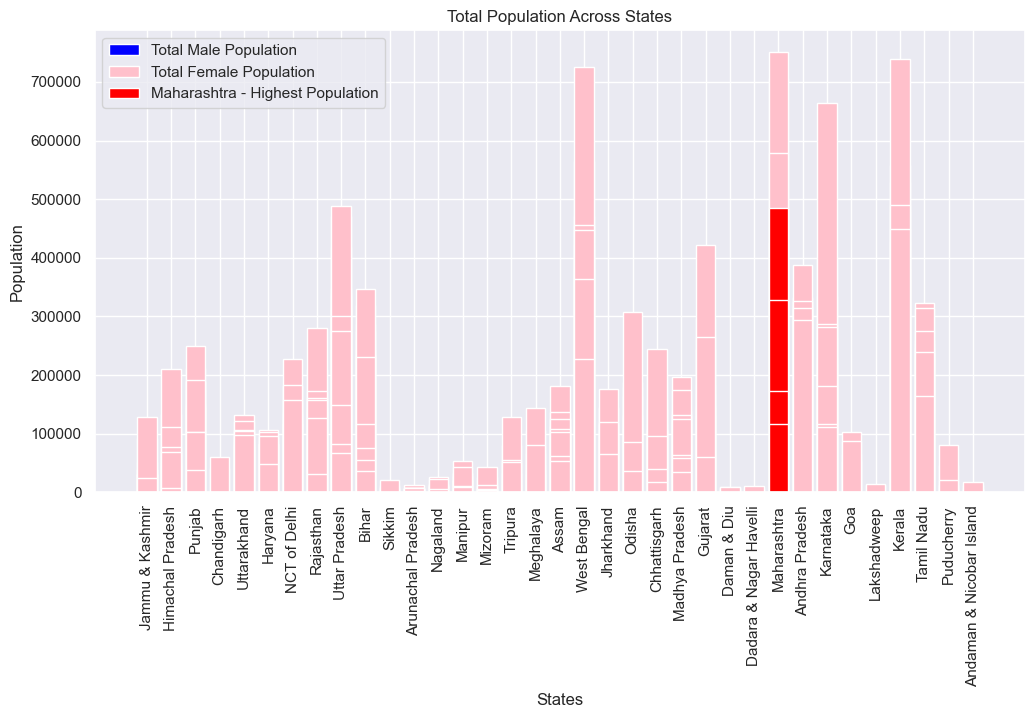

In [97]:
###2.2PCA: Perform detailed Exploratory analysis by creating certain questions:-

##2.21:-Which state has the highest population?

# Find the state with the highest population
highest_population_state = data.loc[data['TOT_M'].idxmax()]['State']

# Plotting total population across states
plt.figure(figsize=(12, 6))
plt.bar(data['State'], data['TOT_M'], color='blue', label='Total Male Population')
plt.bar(data['State'], data['TOT_F'], color='pink', label='Total Female Population')

# Highlight the state with the highest population
plt.bar(data[data['State'] == highest_population_state]['State'],
        data[data['State'] == highest_population_state]['TOT_M'],
        color='red', label=f'{highest_population_state} - Highest Population')

plt.xlabel('States')
plt.ylabel('Population')
plt.title('Total Population Across States')
plt.xticks(rotation=90)
plt.legend()
plt.show()

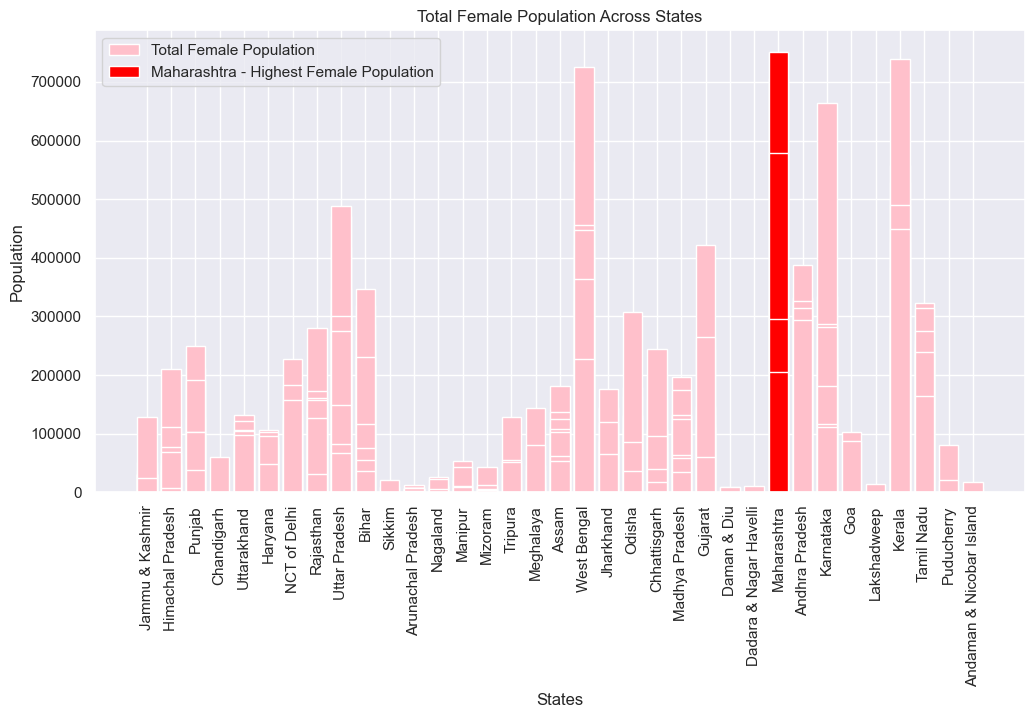

In [98]:
# Find the state with the highest total female population
highest_female_population_state = data.loc[data['TOT_F'].idxmax()]['State']

# Plotting total female population across states
plt.figure(figsize=(12, 6))
plt.bar(data['State'], data['TOT_F'], color='pink', label='Total Female Population')

# Highlight the state with the highest total female population
plt.bar(data[data['State'] == highest_female_population_state]['State'],
        data[data['State'] == highest_female_population_state]['TOT_F'],
        color='red', label=f'{highest_female_population_state} - Highest Female Population')

plt.xlabel('States')
plt.ylabel('Population')
plt.title('Total Female Population Across States')
plt.xticks(rotation=90)
plt.legend()
plt.show()

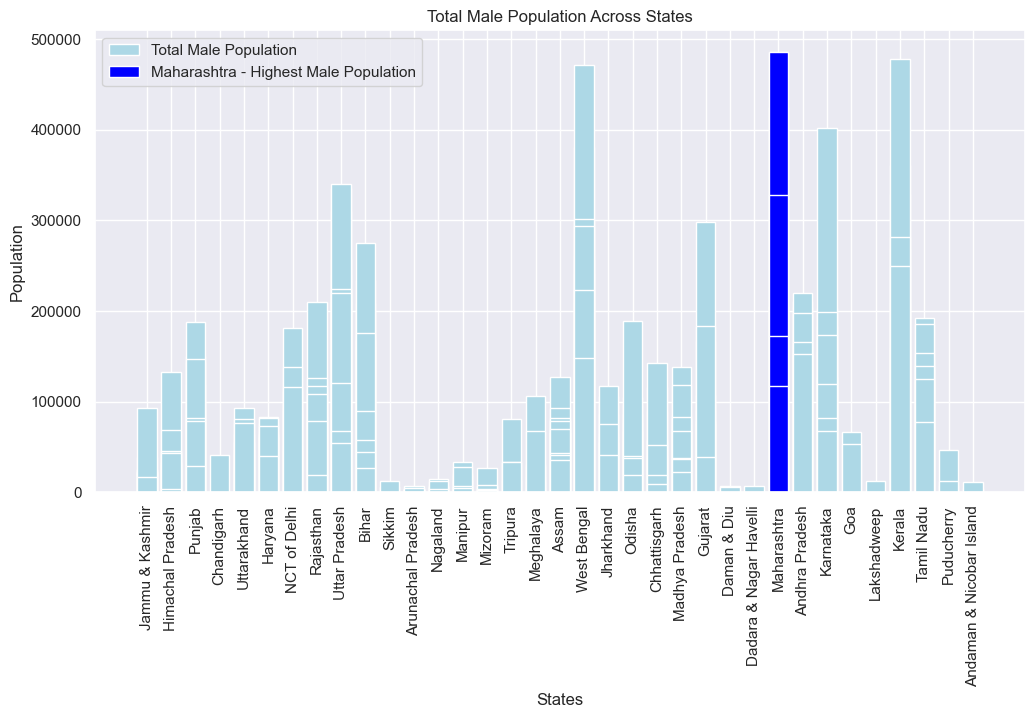

In [99]:
# Find the state with the highest total male population
highest_male_population_state = data.loc[data['TOT_M'].idxmax()]['State']

# Plotting total male population across states
plt.figure(figsize=(12, 6))
plt.bar(data['State'], data['TOT_M'], color='lightblue', label='Total Male Population')

# Highlight the state with the highest total male population
plt.bar(data[data['State'] == highest_male_population_state]['State'],
        data[data['State'] == highest_male_population_state]['TOT_M'],
        color='blue', label=f'{highest_male_population_state} - Highest Male Population')

plt.xlabel('States')
plt.ylabel('Population')
plt.title('Total Male Population Across States')
plt.xticks(rotation=90)
plt.legend()
plt.show()


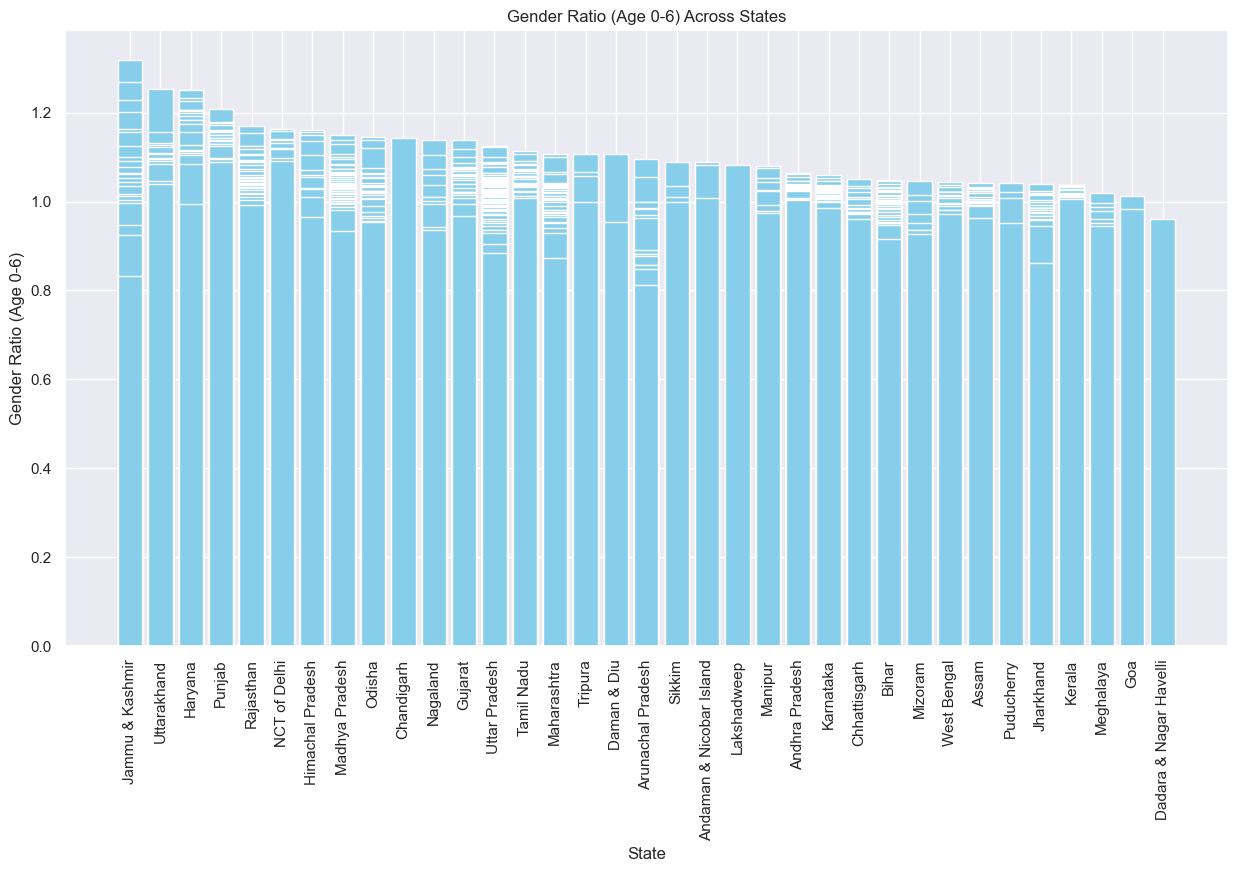

In [100]:

# Calculate gender ratio for age group 0-6
data['Gender_Ratio_0_6'] = data['M_06'] / data['F_06']

# Sort the data by gender ratio
sorted_data = data.sort_values(by='Gender_Ratio_0_6', ascending=False)

# Plotting the gender ratio for age group 0-6 across states
plt.figure(figsize=(15, 8))
plt.bar(sorted_data['State'], sorted_data['Gender_Ratio_0_6'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Gender Ratio (Age 0-6)')
plt.title('Gender Ratio (Age 0-6) Across States')
plt.xticks(rotation=90)
plt.show()


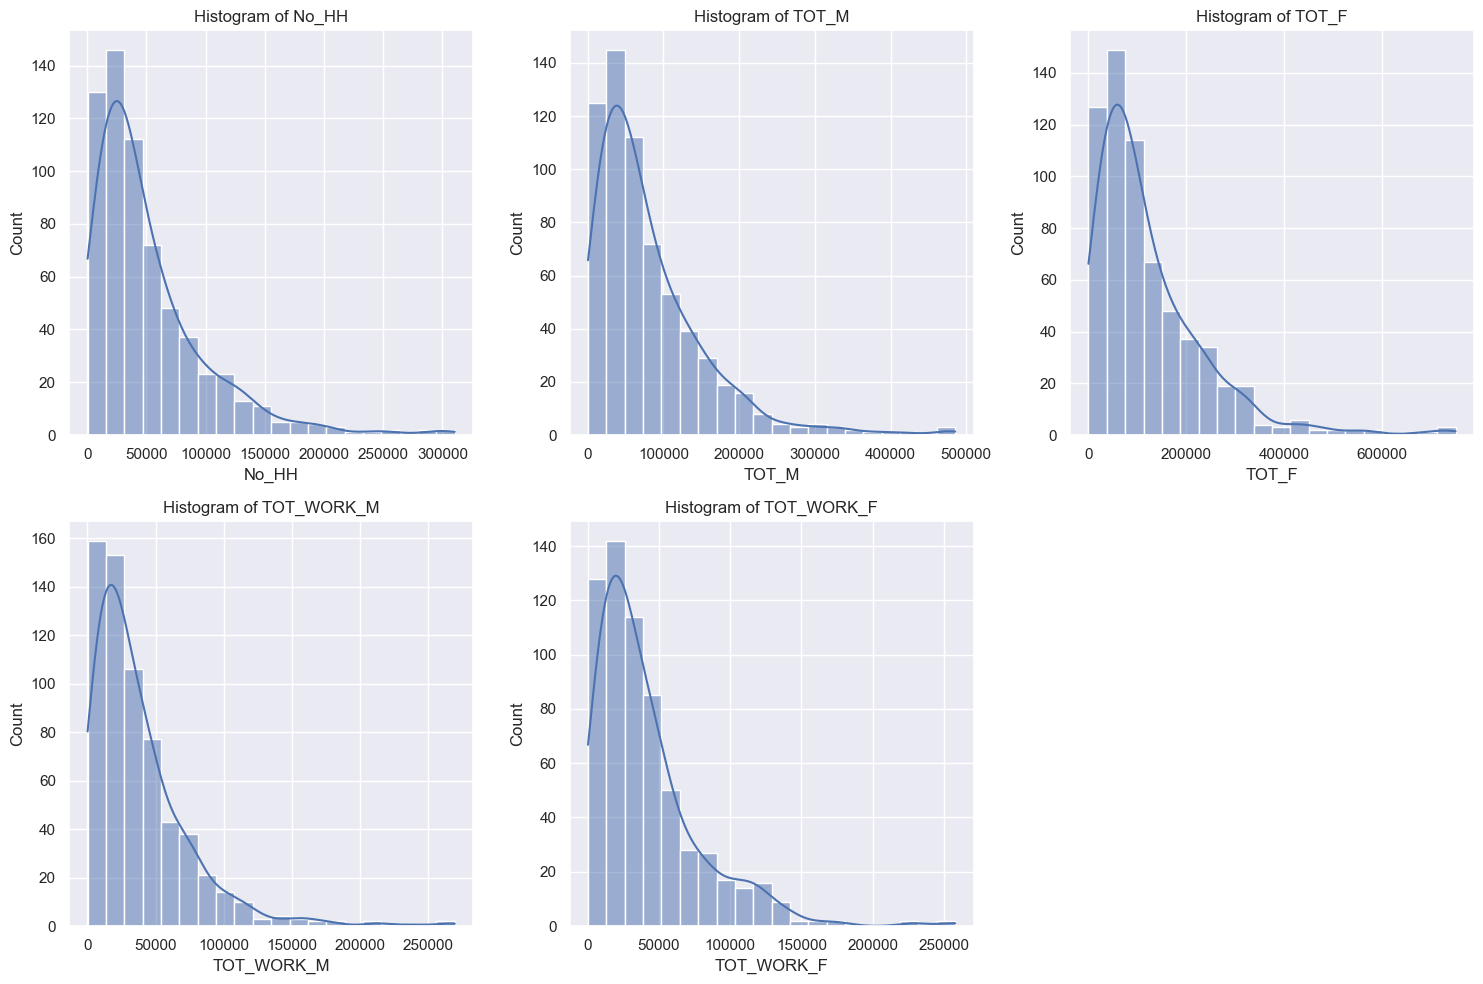

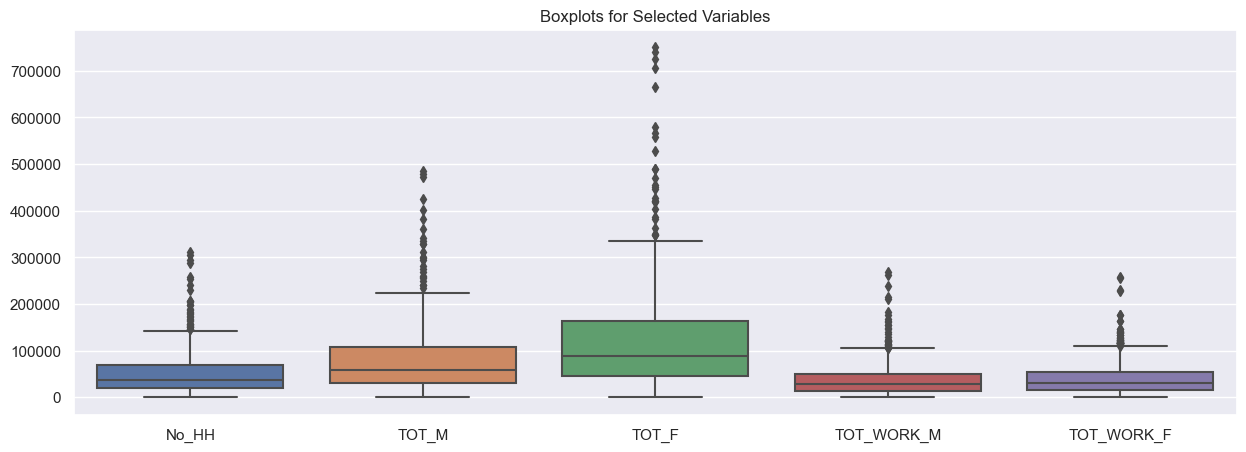

In [101]:
##For EDA - Variables considered:No_HH TOT_M TOT_F TOT_WORK_M TOT_WORK_FNo of HouseholdTotal populaon MaleTotal populaon FemaleTotal Worker Populaon MaleTotal Worker Populaon FemaleUnivariate Analysis:Plong histogram and boxplots for the abovevariables:

# Selected variables for univariate analysis
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']

# Plotting histograms
plt.figure(figsize=(15, 10))
for i, variable in enumerate(selected_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[variable], bins=20, kde=True)
    plt.title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()

# Plotting boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=data[selected_variables])
plt.title('Boxplots for Selected Variables')
plt.show()


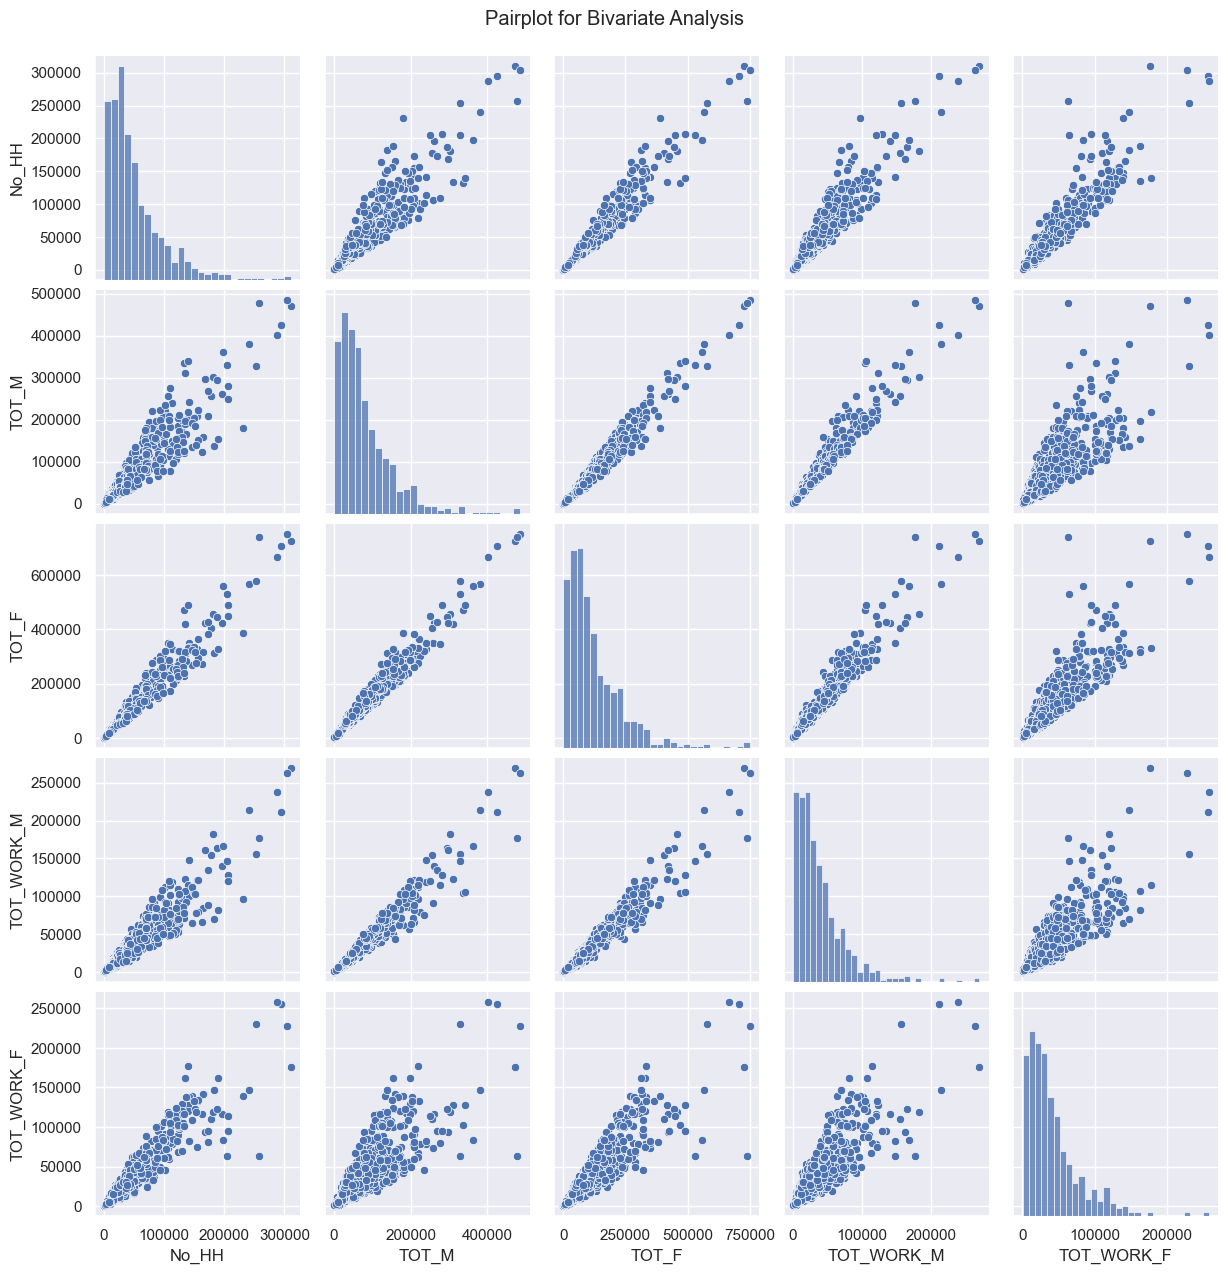

In [102]:
##for bivariate analysis
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']

# Pairplot for bivariate analysis
sns.pairplot(data[selected_variables])
plt.suptitle('Pairplot for Bivariate Analysis', y=1.02)
plt.show()


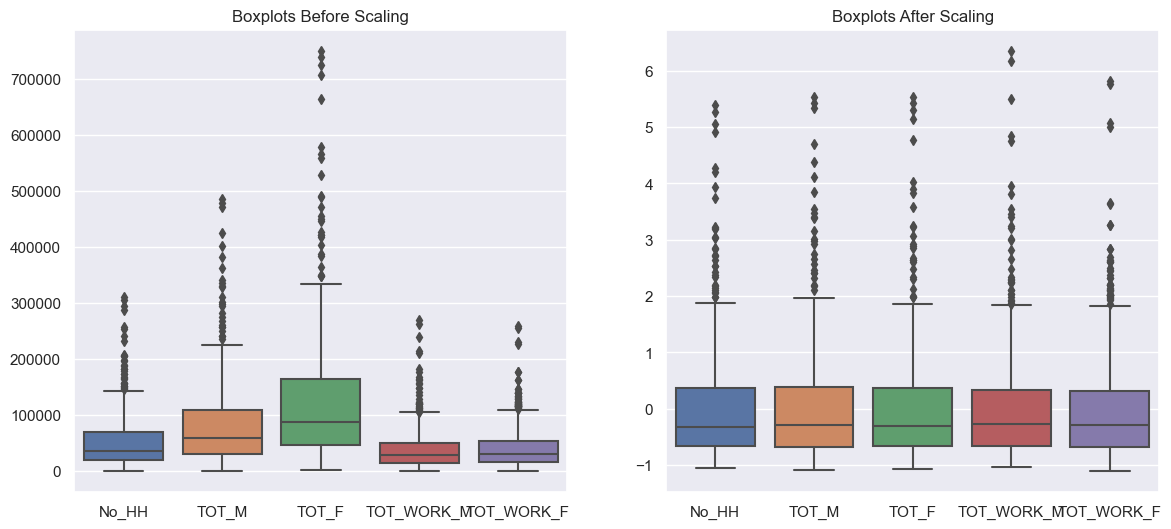

In [104]:
####2.3PCA: We choose not to treat outliers for this case. Do you think that treang outliersfor this case is necessary?
####2.4PCA: Scale the Data using z-score method. Does scaling have any impact on outliers?Compare boxplots before and aer scaling and comment
from scipy import stats

# Identify outliers using Z-score
z_scores = stats.zscore(data[['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']])
outliers = (z_scores > 3) | (z_scores < -3)

# Replace outliers with the median value
data_no_outliers = data.copy()
data_no_outliers[['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']] = np.where(outliers, np.nan, data[['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']])

# Continue with PCA on data_no_outliers
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select relevant variables for demonstration
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']
selected_data = data[selected_variables]

# Create boxplots before scaling
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=selected_data)
plt.title('Boxplots Before Scaling')

# Scale the data using Z-score
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Create boxplots after scaling
scaled_data = pd.DataFrame(scaled_data, columns=selected_variables)
plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_data)
plt.title('Boxplots After Scaling')

plt.show()


In [105]:
##2.5PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant variables for PCA
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']
selected_data = data[selected_variables]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(selected_data)

# Create the covariance matrix
covariance_matrix = np.cov(data_scaled, rowvar=False)

# Perform PCA to obtain eigenvalues and eigenvectors
pca = PCA()
pca.fit(data_scaled)

# Eigenvalues
eigenvalues = pca.explained_variance_

# Eigenvectors
eigenvectors = pca.components_

# Print the results
print("Covariance Matrix:")
print(covariance_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Covariance Matrix:
[[1.00156495 0.91760364 0.97210871 0.9396671  0.92670732]
 [0.91760364 1.00156495 0.98417823 0.9719359  0.80915927]
 [0.97210871 0.98417823 1.00156495 0.970471   0.87760417]
 [0.9396671  0.9719359  0.970471   1.00156495 0.84278548]
 [0.92670732 0.80915927 0.87760417 0.84278548 1.00156495]]

Eigenvalues:
[4.68967901e+00 2.40252729e-01 4.22208034e-02 3.40818653e-02
 1.59031478e-03]

Eigenvectors:
[[ 0.45376475  0.44729627  0.45866518  0.45115786  0.42438948]
 [-0.20283846  0.46529279  0.17218174  0.30730522 -0.78630536]
 [ 0.75836123 -0.26056574  0.23662535 -0.33974644 -0.43078363]
 [-0.21480748  0.48306005  0.36687803 -0.75491272  0.12656235]
 [ 0.36290508  0.5312129  -0.75457846 -0.12922548  0.00498805]]


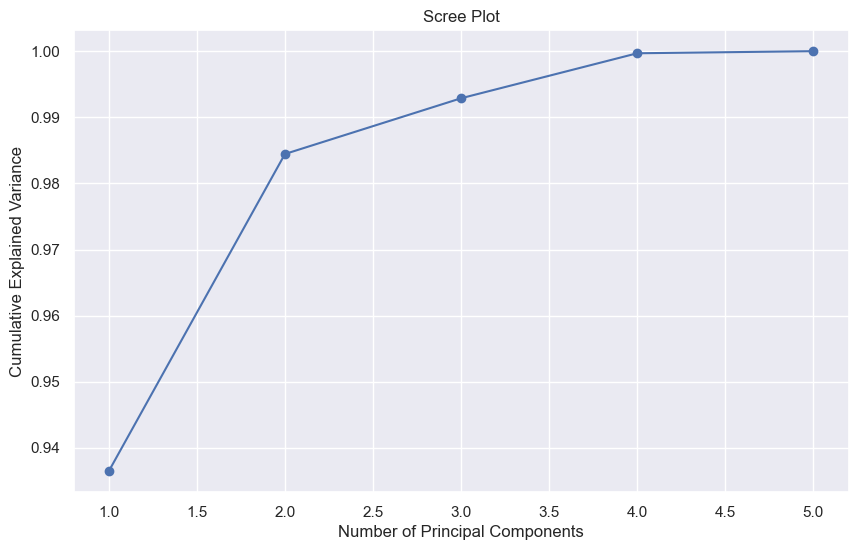

Optimal Number of Principal Components for 90% Explained Variance: 1


In [107]:
###2.6PCA: Idenfy the opmum number of PCs (for this project, take at least 90% explainedvariance). Show Scree plot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame 'data' with the relevant columns

# Select relevant columns for PCA
selected_columns = ['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']

# Extract the subset of data for PCA
data_pca = data[selected_columns]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Fit PCA
pca = PCA()
pca.fit(data_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Identify the optimum number of PCs
optimal_pcs = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Optimal Number of Principal Components for 90% Explained Variance: {optimal_pcs}")


Loadings:
                 PC1
No_HH       0.453765
TOT_M       0.447296
TOT_F       0.458665
TOT_WORK_M  0.451158
TOT_WORK_F  0.424389


KeyError: 'PC2'

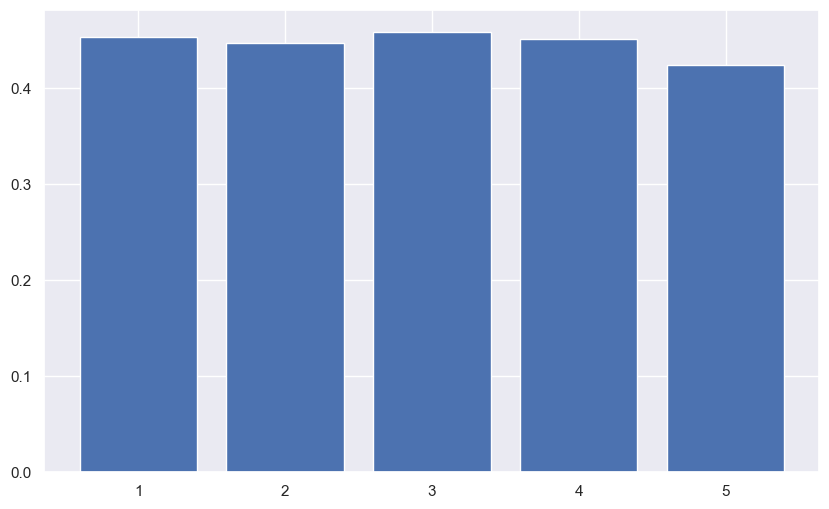

In [108]:
# Fit PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_pcs)
pca_optimal.fit(data_scaled)

# Get the loadings
loadings = pca_optimal.components_.T

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i}' for i in range(1, optimal_pcs + 1)], index=selected_columns)

# Display the loadings
print("Loadings:")
print(loadings_df)

# Plotting loadings for the first two PCs
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(selected_columns) + 1), loadings_df['PC1'], label='PC1')
plt.bar(range(1, len(selected_columns) + 1), loadings_df['PC2'], label='PC2', alpha=0.5)
plt.title('Loadings of Variables on PC1 and PC2')
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.xticks(range(1, len(selected_columns) + 1), selected_columns, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()


In [110]:
###2.8PCA: Write linear equation for first PC.

print('PC 1 = a1x1 + a2x2 + a3X3 +a4X4 + …….+ a57x5724')


PC 1 = a1x1 + a2x2 + a3X3 +a4X4 + …….+ a57x5724
